In [1]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

2023-10-05 19:02:40.846389: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 19:02:41.041949: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-05 19:02:41.041981: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-05 19:02:41.042768: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-05 19:02:41.116545: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 19:02:41.117533: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# dataset_path = "data/training/"

In [3]:
# header = 'filename'
# for i in range(1, 41):
#   header += f' mfcc{i}'
# header += ' label'
# header = header.split()

In [4]:
# file = open('data_1.csv', 'w', newline='')
# with file:
#   writer = csv.writer(file)
#   writer.writerow(header)

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#           semantic_label = dirpath.split("/")[-1]
#           print("\nProcessing: {}".format(semantic_label))
#           for f in filenames:
#               file_path = os.path.join(dirpath, f)
#               to_append = f'{file_path}'
#               # print(file_path)
#               y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#               mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#               for e in mfcc:
#                   to_append += f' {np.mean(e.T, axis=0)}'
#               to_append += f' {semantic_label}'
#               file = open('data_1.csv', 'a', newline='')
#               with file:
#                   writer = csv.writer(file)
#                   writer.writerow(to_append.split())

In [5]:
# data = pd.read_csv('../data_mfccRMScqt.csv')
data = pd.read_csv('../Preprocessing/baru/db1/data_MfccDwtRmsCqtdb1L5.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT_training_80/MVP/New_MVP_062.wav,88.547943,-34.731178,17.439774,3.966827,-17.346939,18.881588,-17.580509,8.225138,2.163004,...,0.162481,0.128590,0.253865,0.286246,0.232347,0.166034,0.149659,0.175466,0.264108,MVP
1,../data/DWT_training_80/MVP/New_MVP_109.wav,130.248093,-18.175362,-7.527256,-1.821126,-0.783999,9.139212,-30.255112,-18.019503,-3.269579,...,0.272742,0.214996,0.163759,0.185034,0.284470,0.427768,0.583855,0.714654,0.804361,MVP
2,../data/DWT_training_80/MVP/New_MVP_009.wav,68.611404,-30.707958,43.091286,-5.395578,-31.639091,25.854515,-19.372128,12.241970,-3.681171,...,0.268128,0.329467,0.240955,0.215759,0.290983,0.327005,0.241768,0.163038,0.190981,MVP
3,../data/DWT_training_80/MVP/New_MVP_069.wav,87.647217,-33.906952,0.952698,-12.743137,-30.600828,29.831501,-26.453606,7.694873,0.659293,...,0.448852,0.387767,0.466638,0.528683,0.326940,0.347330,0.452033,0.500666,0.408247,MVP
4,../data/DWT_training_80/MVP/New_MVP_028.wav,66.994705,-29.505274,41.612465,-9.295410,-28.435057,27.480007,-21.628231,12.457518,-2.749231,...,0.157548,0.251837,0.286741,0.322188,0.280847,0.247853,0.215524,0.166249,0.195999,MVP


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 643.9+ KB


In [7]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [8]:
X.shape

(800, 101)

In [9]:
y.head()

0    MVP
1    MVP
2    MVP
3    MVP
4    MVP
Name: label, dtype: object

In [10]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,88.547943,-34.731178,17.439774,3.966827,-17.346939,18.881588,-17.580509,8.225138,2.163004,-6.991869,...,0.080291,0.162481,0.128590,0.253865,0.286246,0.232347,0.166034,0.149659,0.175466,0.264108
1,130.248093,-18.175362,-7.527256,-1.821126,-0.783999,9.139212,-30.255112,-18.019503,-3.269579,6.034618,...,0.317061,0.272742,0.214996,0.163759,0.185034,0.284470,0.427768,0.583855,0.714654,0.804361
2,68.611404,-30.707958,43.091286,-5.395578,-31.639091,25.854515,-19.372128,12.241970,-3.681171,-0.359709,...,0.276001,0.268128,0.329467,0.240955,0.215759,0.290983,0.327005,0.241768,0.163038,0.190981
3,87.647217,-33.906952,0.952698,-12.743137,-30.600828,29.831501,-26.453606,7.694873,0.659293,-6.993608,...,0.261029,0.448852,0.387767,0.466638,0.528683,0.326940,0.347330,0.452033,0.500666,0.408247
4,66.994705,-29.505274,41.612465,-9.295410,-28.435057,27.480007,-21.628231,12.457518,-2.749231,-0.548040,...,0.262507,0.157548,0.251837,0.286741,0.322188,0.280847,0.247853,0.215524,0.166249,0.195999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,122.400002,-33.452477,19.646780,1.729409,1.753337,4.672876,-8.601256,19.825642,-1.980448,-8.589111,...,0.242414,0.108346,0.093601,0.072591,0.158825,0.268233,0.337521,0.307800,0.186533,0.047926
796,121.832947,-29.811192,13.212755,0.731727,-9.155153,2.505203,-9.537407,11.701306,-14.147835,-2.256289,...,0.261167,0.217466,0.208512,0.321653,0.359078,0.236579,0.090131,0.169021,0.166954,0.050849
797,67.973389,-77.092560,20.854347,3.179512,-0.732732,8.882547,7.136349,-12.011120,-2.628152,0.461927,...,0.065206,0.115020,0.143318,0.126561,0.091858,0.099164,0.161563,0.226875,0.217660,0.115195
798,133.968414,-44.875618,16.931089,-10.013180,9.786585,4.980119,1.346730,-7.787948,3.614681,2.904624,...,0.379176,0.321356,0.243900,0.192252,0.222969,0.250396,0.203819,0.188261,0.250433,0.407095


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_test.shape

(160,)

In [13]:
X_train.shape

(640, 101)

In [14]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
264,38.863163,-55.595146,45.313419,-8.766414,-24.194538,13.574966,-8.415053,10.158276,-9.115362,2.618633,...,0.106329,0.126158,0.112372,0.127090,0.118933,0.125747,0.115665,0.107891,0.104901,0.110099
615,94.010826,-58.346912,10.778488,-0.124478,9.478314,11.104677,-0.315113,7.684118,-2.595906,-0.706198,...,0.168676,0.233797,0.289521,0.311898,0.258455,0.177582,0.150998,0.136721,0.068088,0.089285
329,48.201790,-25.971573,27.409794,-14.839061,-47.245689,17.298771,-28.252590,12.102449,-10.421846,-9.174159,...,0.268269,0.278755,0.255193,0.256548,0.247672,0.232669,0.217411,0.201704,0.180534,0.160764
342,48.094269,-49.138042,46.633171,10.329675,-43.061291,21.810112,-11.370983,6.835371,-7.100191,4.120568,...,0.122581,0.113626,0.093616,0.090092,0.084446,0.075044,0.068941,0.066264,0.062693,0.059516
394,34.963791,-31.233849,43.724621,-6.202907,-31.710018,36.045994,-35.629494,14.948592,0.983517,-7.667053,...,0.192361,0.131781,0.149480,0.156203,0.126482,0.141865,0.118074,0.122918,0.109091,0.106562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,144.153839,-11.913469,-2.526271,4.135743,0.088974,-9.865907,7.576791,-6.504363,-1.910037,-1.414329,...,0.652740,0.516045,0.364383,0.327642,0.327058,0.542939,0.653488,0.461153,0.301702,0.493516
106,74.181267,-37.503239,-1.770461,-13.748187,-29.376072,30.003990,-23.449966,4.790641,2.564129,-6.080320,...,0.297711,0.382728,0.278974,0.299982,0.409939,0.329749,0.367451,0.342643,0.359849,0.288338
270,49.745239,-70.764526,12.864877,-23.689764,-0.861607,5.674476,-10.608487,6.576077,-13.347935,4.320671,...,0.096521,0.115600,0.128278,0.153228,0.164054,0.179603,0.198666,0.225952,0.240927,0.247254
435,42.308937,-40.900303,50.515152,0.296621,-52.888721,15.437298,-24.053650,13.694534,-3.108323,-8.111781,...,0.365725,0.282421,0.277471,0.277037,0.225481,0.214429,0.179828,0.155038,0.128858,0.100966


In [15]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(160,)
(640, 101, 1)
(160, 101, 1)


In [16]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [17]:
X_train.shape[1], X_train.shape[2]

(101, 1)

In [18]:
def build_model(dropout_rate=0):
    model = models.Sequential(
        [
            layers.Conv1D(64, (3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Conv1D(32, (3) , activation="relu"),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Flatten(),
            layers.Dense(64, activation="relu", activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            layers.Dense(5, activation="softmax"),
        ]
    )
    # optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [19]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 64)            256       


KeyboardInterrupt: 

In [ ]:
import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

modeltuning=KerasClassifier(model=build_model,optimizer="adam",
                                      loss=keras.losses.categorical_crossentropy,
                                      batch_size=8,
                                      epochs=100,
                                      verbose=1,
                                      metrics=['accuracy'],
                                      validation_split=0.1)

params= {
        'batch_size': [16, 32, 64],
        'epochs':[10, 20, 30, 40, 50],
        }
gs=GridSearchCV(estimator=modeltuning, param_grid=params, cv=10, verbose=1, scoring='balanced_accuracy')
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X, y, validation_data=(X_test, y_test))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Epoch 1/10


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 14ms/step - loss: 0.9557 - accuracy: 0.6806 - val_loss: 0.4200 - val_accuracy: 0.8813
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3637 - accuracy: 0.8931 - val_loss: 0.2541 - val_accuracy: 0.9563
Epoch 3/10
45/45 [==============================] - 0s 8ms/step - loss: 0.2241 - accuracy: 0.9403 - val_loss: 0.1683 - val_accuracy: 0.9625
Epoch 4/10
45/45 [==============================] - 0s 8ms/step - loss: 0.1600 - accuracy: 0.9583 - val_loss: 0.1310 - val_accuracy: 0.9625
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1279 - accuracy: 0.9708 - val_loss: 0.0941 - val_accuracy: 0.9875
Epoch 6/10
45/45 [==============================] - 0s 9ms/step - loss: 0.0811 - accuracy: 0.9875 - val_loss: 0.0687 - val_accuracy: 0.9937
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0629 - accuracy: 0.9944 - val_loss: 0.0495 - val_accuracy: 1.0000
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 12ms/step - loss: 0.8720 - accuracy: 0.6986 - val_loss: 0.5116 - val_accuracy: 0.8438
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3841 - accuracy: 0.8833 - val_loss: 0.2742 - val_accuracy: 0.9375
Epoch 3/10
45/45 [==============================] - 0s 7ms/step - loss: 0.2300 - accuracy: 0.9403 - val_loss: 0.1785 - val_accuracy: 0.9625
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1778 - accuracy: 0.9569 - val_loss: 0.1819 - val_accuracy: 0.9438
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1307 - accuracy: 0.9708 - val_loss: 0.1020 - val_accuracy: 0.9812
Epoch 6/10
45/45 [==============================] - 0s 9ms/step - loss: 0.1007 - accuracy: 0.9778 - val_loss: 0.0775 - val_accuracy: 0.9812
Epoch 7/10
45/45 [==============================] - 0s 9ms/step - loss: 0.0735 - accuracy: 0.9889 - val_loss: 0.0653 - val_accuracy: 0.9875
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 15ms/step - loss: 1.1320 - accuracy: 0.6250 - val_loss: 0.5058 - val_accuracy: 0.8750
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3949 - accuracy: 0.9014 - val_loss: 0.2549 - val_accuracy: 0.9375
Epoch 3/10
45/45 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.9278 - val_loss: 0.1561 - val_accuracy: 0.9750
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1643 - accuracy: 0.9681 - val_loss: 0.1118 - val_accuracy: 0.9750
Epoch 5/10
45/45 [==============================] - 0s 6ms/step - loss: 0.1233 - accuracy: 0.9750 - val_loss: 0.0835 - val_accuracy: 0.9937
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0873 - accuracy: 0.9875 - val_loss: 0.0559 - val_accuracy: 0.9937
Epoch 7/10
45/45 [==============================] - 0s 6ms/step - loss: 0.0694 - accuracy: 0.9944 - val_loss: 0.0493 - val_accuracy: 1.0000
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.9844 - accuracy: 0.6750 - val_loss: 0.4648 - val_accuracy: 0.9250
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.8792 - val_loss: 0.2991 - val_accuracy: 0.9438
Epoch 3/10
45/45 [==============================] - 0s 9ms/step - loss: 0.2693 - accuracy: 0.9347 - val_loss: 0.1844 - val_accuracy: 0.9688
Epoch 4/10
45/45 [==============================] - 0s 8ms/step - loss: 0.1809 - accuracy: 0.9611 - val_loss: 0.1430 - val_accuracy: 0.9688
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1342 - accuracy: 0.9667 - val_loss: 0.1841 - val_accuracy: 0.9500
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1127 - accuracy: 0.9750 - val_loss: 0.0859 - val_accuracy: 0.9875
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0698 - accuracy: 0.9931 - val_loss: 0.0590 - val_accuracy: 1.0000
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 1.0624 - accuracy: 0.6528 - val_loss: 0.4224 - val_accuracy: 0.9000
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.4014 - accuracy: 0.8806 - val_loss: 0.2329 - val_accuracy: 0.9563
Epoch 3/10
45/45 [==============================] - 0s 7ms/step - loss: 0.2288 - accuracy: 0.9403 - val_loss: 0.1544 - val_accuracy: 0.9812
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1729 - accuracy: 0.9597 - val_loss: 0.1484 - val_accuracy: 0.9625
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1289 - accuracy: 0.9750 - val_loss: 0.0982 - val_accuracy: 0.9875
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0944 - accuracy: 0.9861 - val_loss: 0.0812 - val_accuracy: 0.9875
Epoch 7/10
45/45 [==============================] - 0s 8ms/step - loss: 0.0733 - accuracy: 0.9931 - val_loss: 0.0526 - val_accuracy: 0.9937
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 1s 11ms/step - loss: 1.0120 - accuracy: 0.6431 - val_loss: 0.5740 - val_accuracy: 0.8313
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3947 - accuracy: 0.8944 - val_loss: 0.2498 - val_accuracy: 0.9500
Epoch 3/10
45/45 [==============================] - 0s 7ms/step - loss: 0.2532 - accuracy: 0.9319 - val_loss: 0.1800 - val_accuracy: 0.9750
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1782 - accuracy: 0.9625 - val_loss: 0.1155 - val_accuracy: 0.9625
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1243 - accuracy: 0.9722 - val_loss: 0.1136 - val_accuracy: 0.9812
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0844 - accuracy: 0.9792 - val_loss: 0.0600 - val_accuracy: 0.9937
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0625 - accuracy: 0.9931 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 1.1189 - accuracy: 0.6056 - val_loss: 0.5060 - val_accuracy: 0.8625
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.4077 - accuracy: 0.8903 - val_loss: 0.2592 - val_accuracy: 0.9500
Epoch 3/10
45/45 [==============================] - 0s 7ms/step - loss: 0.2584 - accuracy: 0.9250 - val_loss: 0.1950 - val_accuracy: 0.9563
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1897 - accuracy: 0.9597 - val_loss: 0.1451 - val_accuracy: 0.9688
Epoch 5/10
45/45 [==============================] - 0s 8ms/step - loss: 0.1480 - accuracy: 0.9653 - val_loss: 0.1141 - val_accuracy: 0.9750
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1054 - accuracy: 0.9764 - val_loss: 0.1193 - val_accuracy: 0.9750
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0933 - accuracy: 0.9833 - val_loss: 0.0774 - val_accuracy: 0.9875
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 0.9249 - accuracy: 0.6653 - val_loss: 0.4806 - val_accuracy: 0.8500
Epoch 2/10
45/45 [==============================] - 0s 6ms/step - loss: 0.3958 - accuracy: 0.8778 - val_loss: 0.3332 - val_accuracy: 0.9062
Epoch 3/10
45/45 [==============================] - 0s 7ms/step - loss: 0.2541 - accuracy: 0.9319 - val_loss: 0.2067 - val_accuracy: 0.9625
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1701 - accuracy: 0.9611 - val_loss: 0.1198 - val_accuracy: 0.9812
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1347 - accuracy: 0.9708 - val_loss: 0.1061 - val_accuracy: 0.9812
Epoch 6/10
45/45 [==============================] - 0s 8ms/step - loss: 0.0930 - accuracy: 0.9847 - val_loss: 0.0697 - val_accuracy: 0.9937
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0669 - accuracy: 0.9944 - val_loss: 0.0552 - val_accuracy: 0.9937
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.9623 - accuracy: 0.6625 - val_loss: 0.4206 - val_accuracy: 0.9125
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3351 - accuracy: 0.9153 - val_loss: 0.2928 - val_accuracy: 0.9250
Epoch 3/10
45/45 [==============================] - 0s 8ms/step - loss: 0.2187 - accuracy: 0.9472 - val_loss: 0.1571 - val_accuracy: 0.9750
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1513 - accuracy: 0.9722 - val_loss: 0.0984 - val_accuracy: 0.9812
Epoch 5/10
45/45 [==============================] - 0s 9ms/step - loss: 0.1047 - accuracy: 0.9847 - val_loss: 0.0884 - val_accuracy: 0.9812
Epoch 6/10
45/45 [==============================] - 0s 9ms/step - loss: 0.0894 - accuracy: 0.9903 - val_loss: 0.0614 - val_accuracy: 0.9937
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0679 - accuracy: 0.9931 - val_loss: 0.0467 - val_accuracy: 0.9937
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 1.0097 - accuracy: 0.6333 - val_loss: 0.4818 - val_accuracy: 0.8875
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3847 - accuracy: 0.8847 - val_loss: 0.3095 - val_accuracy: 0.9187
Epoch 3/10
45/45 [==============================] - 0s 7ms/step - loss: 0.2469 - accuracy: 0.9375 - val_loss: 0.1570 - val_accuracy: 0.9812
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1804 - accuracy: 0.9556 - val_loss: 0.1085 - val_accuracy: 0.9750
Epoch 5/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1150 - accuracy: 0.9806 - val_loss: 0.0882 - val_accuracy: 0.9937
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0855 - accuracy: 0.9903 - val_loss: 0.0600 - val_accuracy: 0.9937
Epoch 7/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0604 - accuracy: 0.9944 - val_loss: 0.0467 - val_accuracy: 0.9937
Epoch 8/10
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 1.0411 - accuracy: 0.6472 - val_loss: 0.4425 - val_accuracy: 0.8938
Epoch 2/20
45/45 [==============================] - 0s 7ms/step - loss: 0.4345 - accuracy: 0.8694 - val_loss: 0.3307 - val_accuracy: 0.9000
Epoch 3/20
45/45 [==============================] - 0s 8ms/step - loss: 0.2721 - accuracy: 0.9250 - val_loss: 0.1824 - val_accuracy: 0.9563
Epoch 4/20
45/45 [==============================] - 0s 9ms/step - loss: 0.1868 - accuracy: 0.9472 - val_loss: 0.1313 - val_accuracy: 0.9688
Epoch 5/20
45/45 [==============================] - 0s 10ms/step - loss: 0.1413 - accuracy: 0.9653 - val_loss: 0.1089 - val_accuracy: 0.9750
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1027 - accuracy: 0.9819 - val_loss: 0.0729 - val_accuracy: 0.9875
Epoch 7/20
45/45 [==============================] - 0s 7ms/step - loss: 0.0863 - accuracy: 0.9847 - val_loss: 0.0684 - val_accuracy: 0.9875
Epoch 8/20
45/45 [===========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.9039 - accuracy: 0.6847 - val_loss: 0.4347 - val_accuracy: 0.8562
Epoch 2/20
45/45 [==============================] - 0s 9ms/step - loss: 0.3511 - accuracy: 0.8917 - val_loss: 0.1874 - val_accuracy: 0.9500
Epoch 3/20
45/45 [==============================] - 0s 8ms/step - loss: 0.1873 - accuracy: 0.9569 - val_loss: 0.1488 - val_accuracy: 0.9812
Epoch 4/20
45/45 [==============================] - 0s 7ms/step - loss: 0.1222 - accuracy: 0.9736 - val_loss: 0.0892 - val_accuracy: 0.9812
Epoch 5/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0847 - accuracy: 0.9847 - val_loss: 0.0756 - val_accuracy: 0.9812
Epoch 6/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0572 - accuracy: 0.9972 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 7/20
45/45 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9937
Epoch 8/20
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 12ms/step - loss: 1.3493 - accuracy: 0.5611 - val_loss: 0.6020 - val_accuracy: 0.8750
Epoch 2/20
45/45 [==============================] - 0s 7ms/step - loss: 0.5447 - accuracy: 0.8403 - val_loss: 0.4174 - val_accuracy: 0.8813
Epoch 3/20
45/45 [==============================] - 0s 8ms/step - loss: 0.3461 - accuracy: 0.9014 - val_loss: 0.2344 - val_accuracy: 0.9625
Epoch 4/20
45/45 [==============================] - 0s 7ms/step - loss: 0.2263 - accuracy: 0.9375 - val_loss: 0.1936 - val_accuracy: 0.9688
Epoch 5/20
45/45 [==============================] - 0s 7ms/step - loss: 0.1620 - accuracy: 0.9653 - val_loss: 0.1068 - val_accuracy: 0.9875
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1166 - accuracy: 0.9764 - val_loss: 0.0932 - val_accuracy: 0.9875
Epoch 7/20
45/45 [==============================] - 0s 7ms/step - loss: 0.0899 - accuracy: 0.9875 - val_loss: 0.0844 - val_accuracy: 0.9875
Epoch 8/20
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 0.9027 - accuracy: 0.6889 - val_loss: 0.4559 - val_accuracy: 0.8500
Epoch 2/20
45/45 [==============================] - 0s 7ms/step - loss: 0.3834 - accuracy: 0.8889 - val_loss: 0.2388 - val_accuracy: 0.9438
Epoch 3/20
45/45 [==============================] - 0s 7ms/step - loss: 0.2258 - accuracy: 0.9458 - val_loss: 0.1481 - val_accuracy: 0.9625
Epoch 4/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1442 - accuracy: 0.9653 - val_loss: 0.1028 - val_accuracy: 0.9688
Epoch 5/20
45/45 [==============================] - 0s 8ms/step - loss: 0.1048 - accuracy: 0.9875 - val_loss: 0.0894 - val_accuracy: 0.9750
Epoch 6/20
45/45 [==============================] - 0s 7ms/step - loss: 0.0932 - accuracy: 0.9819 - val_loss: 0.0650 - val_accuracy: 0.9875
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0591 - accuracy: 0.9944 - val_loss: 0.0508 - val_accuracy: 0.9875
Epoch 8/20
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 0.9559 - accuracy: 0.6750 - val_loss: 0.4923 - val_accuracy: 0.8625
Epoch 2/20
45/45 [==============================] - 0s 7ms/step - loss: 0.3996 - accuracy: 0.8806 - val_loss: 0.3422 - val_accuracy: 0.9062
Epoch 3/20
45/45 [==============================] - 0s 6ms/step - loss: 0.2595 - accuracy: 0.9306 - val_loss: 0.1806 - val_accuracy: 0.9625
Epoch 4/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1867 - accuracy: 0.9500 - val_loss: 0.1390 - val_accuracy: 0.9688
Epoch 5/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1382 - accuracy: 0.9681 - val_loss: 0.0950 - val_accuracy: 0.9875
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1302 - accuracy: 0.9653 - val_loss: 0.0790 - val_accuracy: 0.9812
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0947 - accuracy: 0.9792 - val_loss: 0.0645 - val_accuracy: 0.9875
Epoch 8/20
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 1s 11ms/step - loss: 1.0496 - accuracy: 0.6556 - val_loss: 0.4330 - val_accuracy: 0.8875
Epoch 2/20
45/45 [==============================] - 0s 6ms/step - loss: 0.3941 - accuracy: 0.8972 - val_loss: 0.3783 - val_accuracy: 0.8625
Epoch 3/20
45/45 [==============================] - 0s 6ms/step - loss: 0.2771 - accuracy: 0.9264 - val_loss: 0.1504 - val_accuracy: 0.9688
Epoch 4/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1953 - accuracy: 0.9500 - val_loss: 0.1393 - val_accuracy: 0.9812
Epoch 5/20
45/45 [==============================] - 0s 7ms/step - loss: 0.1181 - accuracy: 0.9750 - val_loss: 0.0783 - val_accuracy: 0.9937
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0832 - accuracy: 0.9903 - val_loss: 0.0599 - val_accuracy: 1.0000
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0671 - accuracy: 0.9903 - val_loss: 0.0594 - val_accuracy: 0.9937
Epoch 8/20
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 1s 11ms/step - loss: 0.8661 - accuracy: 0.7000 - val_loss: 0.5236 - val_accuracy: 0.8438
Epoch 2/20
45/45 [==============================] - 0s 6ms/step - loss: 0.4030 - accuracy: 0.8875 - val_loss: 0.2626 - val_accuracy: 0.9438
Epoch 3/20
45/45 [==============================] - 0s 6ms/step - loss: 0.2322 - accuracy: 0.9472 - val_loss: 0.1941 - val_accuracy: 0.9750
Epoch 4/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1619 - accuracy: 0.9653 - val_loss: 0.1417 - val_accuracy: 0.9812
Epoch 5/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1307 - accuracy: 0.9750 - val_loss: 0.1246 - val_accuracy: 0.9812
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0888 - accuracy: 0.9875 - val_loss: 0.0866 - val_accuracy: 0.9812
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0767 - accuracy: 0.9875 - val_loss: 0.0604 - val_accuracy: 0.9875
Epoch 8/20
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 1.0259 - accuracy: 0.6264 - val_loss: 0.4946 - val_accuracy: 0.8687
Epoch 2/20
45/45 [==============================] - 0s 6ms/step - loss: 0.4473 - accuracy: 0.8639 - val_loss: 0.3529 - val_accuracy: 0.9062
Epoch 3/20
45/45 [==============================] - 0s 7ms/step - loss: 0.3101 - accuracy: 0.9069 - val_loss: 0.2714 - val_accuracy: 0.9250
Epoch 4/20
45/45 [==============================] - 0s 6ms/step - loss: 0.2118 - accuracy: 0.9500 - val_loss: 0.1770 - val_accuracy: 0.9500
Epoch 5/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1692 - accuracy: 0.9556 - val_loss: 0.1233 - val_accuracy: 0.9875
Epoch 6/20
45/45 [==============================] - 0s 7ms/step - loss: 0.1197 - accuracy: 0.9792 - val_loss: 0.1014 - val_accuracy: 0.9875
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0973 - accuracy: 0.9833 - val_loss: 0.0823 - val_accuracy: 0.9937
Epoch 8/20
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 1.0081 - accuracy: 0.6569 - val_loss: 0.5521 - val_accuracy: 0.8375
Epoch 2/20
45/45 [==============================] - 0s 6ms/step - loss: 0.4192 - accuracy: 0.8736 - val_loss: 0.2871 - val_accuracy: 0.9250
Epoch 3/20
45/45 [==============================] - 0s 6ms/step - loss: 0.2904 - accuracy: 0.9167 - val_loss: 0.1652 - val_accuracy: 0.9750
Epoch 4/20
45/45 [==============================] - 0s 5ms/step - loss: 0.1782 - accuracy: 0.9611 - val_loss: 0.1292 - val_accuracy: 0.9812
Epoch 5/20
45/45 [==============================] - 0s 6ms/step - loss: 0.1228 - accuracy: 0.9806 - val_loss: 0.1319 - val_accuracy: 0.9688
Epoch 6/20
45/45 [==============================] - 0s 7ms/step - loss: 0.0960 - accuracy: 0.9847 - val_loss: 0.0751 - val_accuracy: 0.9875
Epoch 7/20
45/45 [==============================] - 0s 7ms/step - loss: 0.0791 - accuracy: 0.9875 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 8/20
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 0.9109 - accuracy: 0.7000 - val_loss: 0.4214 - val_accuracy: 0.8813
Epoch 2/20
45/45 [==============================] - 0s 7ms/step - loss: 0.3711 - accuracy: 0.8917 - val_loss: 0.2407 - val_accuracy: 0.9563
Epoch 3/20
45/45 [==============================] - 0s 7ms/step - loss: 0.2491 - accuracy: 0.9319 - val_loss: 0.1917 - val_accuracy: 0.9500
Epoch 4/20
45/45 [==============================] - 0s 7ms/step - loss: 0.1645 - accuracy: 0.9528 - val_loss: 0.1234 - val_accuracy: 0.9812
Epoch 5/20
45/45 [==============================] - 0s 7ms/step - loss: 0.1305 - accuracy: 0.9694 - val_loss: 0.0854 - val_accuracy: 0.9875
Epoch 6/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0867 - accuracy: 0.9903 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0655 - accuracy: 0.9903 - val_loss: 0.0559 - val_accuracy: 0.9937
Epoch 8/20
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 15ms/step - loss: 0.9561 - accuracy: 0.6556 - val_loss: 0.4567 - val_accuracy: 0.8687
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3921 - accuracy: 0.8819 - val_loss: 0.2579 - val_accuracy: 0.9375
Epoch 3/30
45/45 [==============================] - 0s 7ms/step - loss: 0.2419 - accuracy: 0.9292 - val_loss: 0.1667 - val_accuracy: 0.9688
Epoch 4/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1726 - accuracy: 0.9556 - val_loss: 0.1239 - val_accuracy: 0.9812
Epoch 5/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1325 - accuracy: 0.9681 - val_loss: 0.1036 - val_accuracy: 0.9625
Epoch 6/30
45/45 [==============================] - 0s 10ms/step - loss: 0.0834 - accuracy: 0.9875 - val_loss: 0.0948 - val_accuracy: 0.9750
Epoch 7/30
45/45 [==============================] - 0s 7ms/step - loss: 0.0684 - accuracy: 0.9917 - val_loss: 0.0632 - val_accuracy: 0.9875
Epoch 8/30
45/45 [===========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 0.9290 - accuracy: 0.6875 - val_loss: 0.4402 - val_accuracy: 0.8938
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3771 - accuracy: 0.9014 - val_loss: 0.2763 - val_accuracy: 0.9563
Epoch 3/30
45/45 [==============================] - 0s 6ms/step - loss: 0.2409 - accuracy: 0.9514 - val_loss: 0.2247 - val_accuracy: 0.9375
Epoch 4/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1918 - accuracy: 0.9458 - val_loss: 0.1579 - val_accuracy: 0.9625
Epoch 5/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1257 - accuracy: 0.9736 - val_loss: 0.1158 - val_accuracy: 0.9750
Epoch 6/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1050 - accuracy: 0.9764 - val_loss: 0.1220 - val_accuracy: 0.9812
Epoch 7/30
45/45 [==============================] - 0s 6ms/step - loss: 0.0855 - accuracy: 0.9847 - val_loss: 0.0765 - val_accuracy: 0.9812
Epoch 8/30
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 1.0633 - accuracy: 0.6292 - val_loss: 0.4965 - val_accuracy: 0.8750
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.4312 - accuracy: 0.8611 - val_loss: 0.3211 - val_accuracy: 0.9125
Epoch 3/30
45/45 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.9319 - val_loss: 0.2119 - val_accuracy: 0.9250
Epoch 4/30
45/45 [==============================] - 0s 6ms/step - loss: 0.1566 - accuracy: 0.9694 - val_loss: 0.0944 - val_accuracy: 0.9812
Epoch 5/30
45/45 [==============================] - 0s 6ms/step - loss: 0.1040 - accuracy: 0.9819 - val_loss: 0.0912 - val_accuracy: 0.9875
Epoch 6/30
45/45 [==============================] - 0s 6ms/step - loss: 0.0859 - accuracy: 0.9847 - val_loss: 0.0779 - val_accuracy: 0.9937
Epoch 7/30
45/45 [==============================] - 0s 6ms/step - loss: 0.0627 - accuracy: 0.9958 - val_loss: 0.0478 - val_accuracy: 0.9937
Epoch 8/30
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 1.0259 - accuracy: 0.6514 - val_loss: 0.4920 - val_accuracy: 0.8188
Epoch 2/30
45/45 [==============================] - 0s 6ms/step - loss: 0.3652 - accuracy: 0.8903 - val_loss: 0.2519 - val_accuracy: 0.9312
Epoch 3/30
45/45 [==============================] - 0s 6ms/step - loss: 0.2487 - accuracy: 0.9361 - val_loss: 0.1882 - val_accuracy: 0.9563
Epoch 4/30
45/45 [==============================] - 0s 5ms/step - loss: 0.1757 - accuracy: 0.9569 - val_loss: 0.1221 - val_accuracy: 0.9812
Epoch 5/30
45/45 [==============================] - 0s 6ms/step - loss: 0.1275 - accuracy: 0.9653 - val_loss: 0.0960 - val_accuracy: 0.9937
Epoch 6/30
45/45 [==============================] - 0s 6ms/step - loss: 0.0886 - accuracy: 0.9903 - val_loss: 0.0698 - val_accuracy: 0.9937
Epoch 7/30
45/45 [==============================] - 0s 5ms/step - loss: 0.0726 - accuracy: 0.9917 - val_loss: 0.0626 - val_accuracy: 0.9937
Epoch 8/30
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 12ms/step - loss: 0.8382 - accuracy: 0.7014 - val_loss: 0.3507 - val_accuracy: 0.9062
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3190 - accuracy: 0.9125 - val_loss: 0.2018 - val_accuracy: 0.9500
Epoch 3/30
45/45 [==============================] - 0s 7ms/step - loss: 0.2011 - accuracy: 0.9472 - val_loss: 0.1353 - val_accuracy: 0.9625
Epoch 4/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1450 - accuracy: 0.9611 - val_loss: 0.0894 - val_accuracy: 0.9937
Epoch 5/30
45/45 [==============================] - 0s 7ms/step - loss: 0.0900 - accuracy: 0.9847 - val_loss: 0.0554 - val_accuracy: 0.9937
Epoch 6/30
45/45 [==============================] - 0s 7ms/step - loss: 0.0678 - accuracy: 0.9903 - val_loss: 0.0519 - val_accuracy: 0.9875
Epoch 7/30
45/45 [==============================] - 0s 7ms/step - loss: 0.0458 - accuracy: 0.9972 - val_loss: 0.0352 - val_accuracy: 1.0000
Epoch 8/30
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.8917 - accuracy: 0.6653 - val_loss: 0.3997 - val_accuracy: 0.8938
Epoch 2/30
45/45 [==============================] - 0s 6ms/step - loss: 0.3475 - accuracy: 0.9181 - val_loss: 0.2308 - val_accuracy: 0.9500
Epoch 3/30
45/45 [==============================] - 0s 8ms/step - loss: 0.2113 - accuracy: 0.9472 - val_loss: 0.1342 - val_accuracy: 0.9688
Epoch 4/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1360 - accuracy: 0.9708 - val_loss: 0.1125 - val_accuracy: 0.9812
Epoch 5/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1003 - accuracy: 0.9819 - val_loss: 0.0565 - val_accuracy: 0.9937
Epoch 6/30
45/45 [==============================] - 0s 8ms/step - loss: 0.0690 - accuracy: 0.9903 - val_loss: 0.0485 - val_accuracy: 0.9937
Epoch 7/30
45/45 [==============================] - 0s 8ms/step - loss: 0.0571 - accuracy: 0.9958 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 8/30
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 6s 17ms/step - loss: 1.0072 - accuracy: 0.6625 - val_loss: 0.5050 - val_accuracy: 0.8687
Epoch 2/30
45/45 [==============================] - 0s 8ms/step - loss: 0.4315 - accuracy: 0.8833 - val_loss: 0.3696 - val_accuracy: 0.9062
Epoch 3/30
45/45 [==============================] - 0s 8ms/step - loss: 0.2698 - accuracy: 0.9347 - val_loss: 0.2091 - val_accuracy: 0.9500
Epoch 4/30
45/45 [==============================] - 0s 8ms/step - loss: 0.1949 - accuracy: 0.9556 - val_loss: 0.1790 - val_accuracy: 0.9625
Epoch 5/30
45/45 [==============================] - 0s 8ms/step - loss: 0.1325 - accuracy: 0.9736 - val_loss: 0.1469 - val_accuracy: 0.9812
Epoch 6/30
45/45 [==============================] - 0s 9ms/step - loss: 0.1175 - accuracy: 0.9736 - val_loss: 0.0861 - val_accuracy: 0.9812
Epoch 7/30
45/45 [==============================] - 0s 7ms/step - loss: 0.0865 - accuracy: 0.9847 - val_loss: 0.0958 - val_accuracy: 0.9688
Epoch 8/30
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.8801 - accuracy: 0.6667 - val_loss: 0.4648 - val_accuracy: 0.9062
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3813 - accuracy: 0.9042 - val_loss: 0.2990 - val_accuracy: 0.9312
Epoch 3/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2319 - accuracy: 0.9458 - val_loss: 0.1875 - val_accuracy: 0.9625
Epoch 4/30
45/45 [==============================] - 0s 8ms/step - loss: 0.1722 - accuracy: 0.9625 - val_loss: 0.1431 - val_accuracy: 0.9750
Epoch 5/30
45/45 [==============================] - 0s 8ms/step - loss: 0.1385 - accuracy: 0.9625 - val_loss: 0.1114 - val_accuracy: 0.9875
Epoch 6/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1044 - accuracy: 0.9833 - val_loss: 0.0815 - val_accuracy: 0.9937
Epoch 7/30
45/45 [==============================] - 0s 7ms/step - loss: 0.0746 - accuracy: 0.9931 - val_loss: 0.0676 - val_accuracy: 0.9937
Epoch 8/30
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.8334 - accuracy: 0.7236 - val_loss: 0.3850 - val_accuracy: 0.9250
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3528 - accuracy: 0.9028 - val_loss: 0.2501 - val_accuracy: 0.9375
Epoch 3/30
45/45 [==============================] - 0s 7ms/step - loss: 0.2029 - accuracy: 0.9514 - val_loss: 0.1377 - val_accuracy: 0.9625
Epoch 4/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1613 - accuracy: 0.9611 - val_loss: 0.1546 - val_accuracy: 0.9625
Epoch 5/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1225 - accuracy: 0.9736 - val_loss: 0.0777 - val_accuracy: 0.9812
Epoch 6/30
45/45 [==============================] - 0s 6ms/step - loss: 0.0752 - accuracy: 0.9903 - val_loss: 0.0612 - val_accuracy: 0.9875
Epoch 7/30
45/45 [==============================] - 0s 7ms/step - loss: 0.0614 - accuracy: 0.9958 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 8/30
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 14ms/step - loss: 0.8770 - accuracy: 0.7167 - val_loss: 0.4314 - val_accuracy: 0.8938
Epoch 2/30
45/45 [==============================] - 0s 7ms/step - loss: 0.3522 - accuracy: 0.9083 - val_loss: 0.2668 - val_accuracy: 0.9312
Epoch 3/30
45/45 [==============================] - 0s 7ms/step - loss: 0.2552 - accuracy: 0.9250 - val_loss: 0.1797 - val_accuracy: 0.9438
Epoch 4/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1650 - accuracy: 0.9542 - val_loss: 0.1842 - val_accuracy: 0.9563
Epoch 5/30
45/45 [==============================] - 0s 7ms/step - loss: 0.1514 - accuracy: 0.9639 - val_loss: 0.0993 - val_accuracy: 0.9812
Epoch 6/30
45/45 [==============================] - 0s 8ms/step - loss: 0.0822 - accuracy: 0.9861 - val_loss: 0.0653 - val_accuracy: 0.9937
Epoch 7/30
45/45 [==============================] - 0s 7ms/step - loss: 0.0683 - accuracy: 0.9917 - val_loss: 0.0608 - val_accuracy: 0.9937
Epoch 8/30
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 12ms/step - loss: 1.0063 - accuracy: 0.6417 - val_loss: 0.4812 - val_accuracy: 0.8750
Epoch 2/40
45/45 [==============================] - 0s 7ms/step - loss: 0.3855 - accuracy: 0.9028 - val_loss: 0.2734 - val_accuracy: 0.9250
Epoch 3/40
45/45 [==============================] - 0s 7ms/step - loss: 0.2633 - accuracy: 0.9292 - val_loss: 0.1534 - val_accuracy: 0.9688
Epoch 4/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1402 - accuracy: 0.9708 - val_loss: 0.1184 - val_accuracy: 0.9688
Epoch 5/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1000 - accuracy: 0.9861 - val_loss: 0.0655 - val_accuracy: 0.9875
Epoch 6/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0657 - accuracy: 0.9958 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0486 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 8/40
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.8319 - accuracy: 0.6944 - val_loss: 0.5043 - val_accuracy: 0.8438
Epoch 2/40
45/45 [==============================] - 0s 7ms/step - loss: 0.3586 - accuracy: 0.9056 - val_loss: 0.2682 - val_accuracy: 0.9563
Epoch 3/40
45/45 [==============================] - 0s 7ms/step - loss: 0.2362 - accuracy: 0.9514 - val_loss: 0.1677 - val_accuracy: 0.9563
Epoch 4/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1529 - accuracy: 0.9653 - val_loss: 0.1224 - val_accuracy: 0.9688
Epoch 5/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1208 - accuracy: 0.9750 - val_loss: 0.1027 - val_accuracy: 0.9812
Epoch 6/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0856 - accuracy: 0.9875 - val_loss: 0.0631 - val_accuracy: 0.9875
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0658 - accuracy: 0.9931 - val_loss: 0.0488 - val_accuracy: 0.9937
Epoch 8/40
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.9777 - accuracy: 0.6847 - val_loss: 0.4159 - val_accuracy: 0.8875
Epoch 2/40
45/45 [==============================] - 0s 7ms/step - loss: 0.3711 - accuracy: 0.8986 - val_loss: 0.2571 - val_accuracy: 0.9438
Epoch 3/40
45/45 [==============================] - 0s 7ms/step - loss: 0.2421 - accuracy: 0.9417 - val_loss: 0.1840 - val_accuracy: 0.9750
Epoch 4/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1717 - accuracy: 0.9611 - val_loss: 0.1182 - val_accuracy: 0.9750
Epoch 5/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1452 - accuracy: 0.9681 - val_loss: 0.0974 - val_accuracy: 0.9812
Epoch 6/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0895 - accuracy: 0.9875 - val_loss: 0.0656 - val_accuracy: 0.9875
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0673 - accuracy: 0.9917 - val_loss: 0.0622 - val_accuracy: 0.9875
Epoch 8/40
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 1.0235 - accuracy: 0.6569 - val_loss: 0.4133 - val_accuracy: 0.9125
Epoch 2/40
45/45 [==============================] - 0s 6ms/step - loss: 0.4142 - accuracy: 0.8764 - val_loss: 0.2651 - val_accuracy: 0.9375
Epoch 3/40
45/45 [==============================] - 0s 7ms/step - loss: 0.2452 - accuracy: 0.9347 - val_loss: 0.1887 - val_accuracy: 0.9563
Epoch 4/40
45/45 [==============================] - 0s 8ms/step - loss: 0.1748 - accuracy: 0.9625 - val_loss: 0.1122 - val_accuracy: 0.9750
Epoch 5/40
45/45 [==============================] - 0s 8ms/step - loss: 0.1250 - accuracy: 0.9694 - val_loss: 0.0888 - val_accuracy: 0.9750
Epoch 6/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1005 - accuracy: 0.9819 - val_loss: 0.0624 - val_accuracy: 1.0000
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0709 - accuracy: 0.9931 - val_loss: 0.0599 - val_accuracy: 1.0000
Epoch 8/40
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 18ms/step - loss: 0.9131 - accuracy: 0.6792 - val_loss: 0.3775 - val_accuracy: 0.9000
Epoch 2/40
45/45 [==============================] - 0s 10ms/step - loss: 0.3459 - accuracy: 0.9042 - val_loss: 0.2194 - val_accuracy: 0.9625
Epoch 3/40
45/45 [==============================] - 0s 11ms/step - loss: 0.2470 - accuracy: 0.9375 - val_loss: 0.1734 - val_accuracy: 0.9688
Epoch 4/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1729 - accuracy: 0.9583 - val_loss: 0.1238 - val_accuracy: 0.9750
Epoch 5/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1160 - accuracy: 0.9833 - val_loss: 0.1340 - val_accuracy: 0.9750
Epoch 6/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1069 - accuracy: 0.9819 - val_loss: 0.0607 - val_accuracy: 1.0000
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0661 - accuracy: 0.9944 - val_loss: 0.0492 - val_accuracy: 0.9937
Epoch 8/40
45/45 [==========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.9540 - accuracy: 0.6597 - val_loss: 0.4628 - val_accuracy: 0.8813
Epoch 2/40
45/45 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.8736 - val_loss: 0.3020 - val_accuracy: 0.9375
Epoch 3/40
45/45 [==============================] - 0s 7ms/step - loss: 0.2571 - accuracy: 0.9333 - val_loss: 0.2502 - val_accuracy: 0.9438
Epoch 4/40
45/45 [==============================] - 0s 6ms/step - loss: 0.2042 - accuracy: 0.9500 - val_loss: 0.1585 - val_accuracy: 0.9750
Epoch 5/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1355 - accuracy: 0.9708 - val_loss: 0.1666 - val_accuracy: 0.9625
Epoch 6/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1145 - accuracy: 0.9792 - val_loss: 0.0883 - val_accuracy: 0.9812
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0802 - accuracy: 0.9847 - val_loss: 0.0564 - val_accuracy: 0.9875
Epoch 8/40
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 16ms/step - loss: 0.9792 - accuracy: 0.6583 - val_loss: 0.4631 - val_accuracy: 0.8750
Epoch 2/40
45/45 [==============================] - 0s 8ms/step - loss: 0.3844 - accuracy: 0.8875 - val_loss: 0.2683 - val_accuracy: 0.9375
Epoch 3/40
45/45 [==============================] - 0s 10ms/step - loss: 0.2570 - accuracy: 0.9250 - val_loss: 0.1848 - val_accuracy: 0.9625
Epoch 4/40
45/45 [==============================] - 0s 9ms/step - loss: 0.1811 - accuracy: 0.9528 - val_loss: 0.1624 - val_accuracy: 0.9688
Epoch 5/40
45/45 [==============================] - 0s 10ms/step - loss: 0.1235 - accuracy: 0.9736 - val_loss: 0.1210 - val_accuracy: 0.9688
Epoch 6/40
45/45 [==============================] - 1s 11ms/step - loss: 0.0950 - accuracy: 0.9819 - val_loss: 0.0720 - val_accuracy: 0.9812
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0679 - accuracy: 0.9875 - val_loss: 0.0501 - val_accuracy: 0.9937
Epoch 8/40
45/45 [=========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 1.0994 - accuracy: 0.6319 - val_loss: 0.4772 - val_accuracy: 0.8625
Epoch 2/40
45/45 [==============================] - 0s 6ms/step - loss: 0.4540 - accuracy: 0.8514 - val_loss: 0.3609 - val_accuracy: 0.8813
Epoch 3/40
45/45 [==============================] - 0s 7ms/step - loss: 0.2786 - accuracy: 0.9236 - val_loss: 0.2379 - val_accuracy: 0.9563
Epoch 4/40
45/45 [==============================] - 0s 7ms/step - loss: 0.2010 - accuracy: 0.9528 - val_loss: 0.1476 - val_accuracy: 0.9750
Epoch 5/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1327 - accuracy: 0.9778 - val_loss: 0.1173 - val_accuracy: 0.9750
Epoch 6/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1220 - accuracy: 0.9722 - val_loss: 0.0827 - val_accuracy: 0.9937
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0807 - accuracy: 0.9861 - val_loss: 0.0985 - val_accuracy: 0.9875
Epoch 8/40
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 15ms/step - loss: 1.0512 - accuracy: 0.6042 - val_loss: 0.6247 - val_accuracy: 0.7625
Epoch 2/40
45/45 [==============================] - 0s 6ms/step - loss: 0.4407 - accuracy: 0.8639 - val_loss: 0.3382 - val_accuracy: 0.9062
Epoch 3/40
45/45 [==============================] - 0s 7ms/step - loss: 0.2735 - accuracy: 0.9194 - val_loss: 0.1820 - val_accuracy: 0.9563
Epoch 4/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1924 - accuracy: 0.9528 - val_loss: 0.1352 - val_accuracy: 0.9750
Epoch 5/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1450 - accuracy: 0.9681 - val_loss: 0.1048 - val_accuracy: 0.9812
Epoch 6/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1052 - accuracy: 0.9792 - val_loss: 0.0832 - val_accuracy: 0.9875
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0951 - accuracy: 0.9792 - val_loss: 0.0615 - val_accuracy: 0.9937
Epoch 8/40
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.9622 - accuracy: 0.6278 - val_loss: 0.4585 - val_accuracy: 0.8938
Epoch 2/40
45/45 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.8708 - val_loss: 0.2564 - val_accuracy: 0.9438
Epoch 3/40
45/45 [==============================] - 0s 7ms/step - loss: 0.2828 - accuracy: 0.9194 - val_loss: 0.1519 - val_accuracy: 0.9750
Epoch 4/40
45/45 [==============================] - 0s 7ms/step - loss: 0.1873 - accuracy: 0.9458 - val_loss: 0.1196 - val_accuracy: 0.9812
Epoch 5/40
45/45 [==============================] - 0s 6ms/step - loss: 0.1391 - accuracy: 0.9736 - val_loss: 0.0861 - val_accuracy: 0.9875
Epoch 6/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0882 - accuracy: 0.9903 - val_loss: 0.0846 - val_accuracy: 1.0000
Epoch 7/40
45/45 [==============================] - 0s 7ms/step - loss: 0.0808 - accuracy: 0.9861 - val_loss: 0.0645 - val_accuracy: 1.0000
Epoch 8/40
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 13ms/step - loss: 0.8726 - accuracy: 0.7139 - val_loss: 0.4292 - val_accuracy: 0.8875
Epoch 2/50
45/45 [==============================] - 0s 7ms/step - loss: 0.3665 - accuracy: 0.9014 - val_loss: 0.3511 - val_accuracy: 0.9187
Epoch 3/50
45/45 [==============================] - 0s 7ms/step - loss: 0.2511 - accuracy: 0.9431 - val_loss: 0.1557 - val_accuracy: 0.9625
Epoch 4/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1672 - accuracy: 0.9542 - val_loss: 0.1955 - val_accuracy: 0.9500
Epoch 5/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1590 - accuracy: 0.9597 - val_loss: 0.1237 - val_accuracy: 0.9750
Epoch 6/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1046 - accuracy: 0.9833 - val_loss: 0.0579 - val_accuracy: 1.0000
Epoch 7/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0693 - accuracy: 0.9903 - val_loss: 0.0487 - val_accuracy: 0.9937
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 0.8776 - accuracy: 0.6931 - val_loss: 0.4342 - val_accuracy: 0.8938
Epoch 2/50
45/45 [==============================] - 0s 7ms/step - loss: 0.3549 - accuracy: 0.8903 - val_loss: 0.2667 - val_accuracy: 0.9563
Epoch 3/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2120 - accuracy: 0.9472 - val_loss: 0.1313 - val_accuracy: 0.9812
Epoch 4/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1559 - accuracy: 0.9625 - val_loss: 0.0918 - val_accuracy: 0.9875
Epoch 5/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1038 - accuracy: 0.9806 - val_loss: 0.1102 - val_accuracy: 0.9750
Epoch 6/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0821 - accuracy: 0.9889 - val_loss: 0.0578 - val_accuracy: 0.9937
Epoch 7/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0576 - accuracy: 0.9986 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 0.8384 - accuracy: 0.7125 - val_loss: 0.4158 - val_accuracy: 0.8875
Epoch 2/50
45/45 [==============================] - 0s 7ms/step - loss: 0.3549 - accuracy: 0.9000 - val_loss: 0.2342 - val_accuracy: 0.9375
Epoch 3/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2321 - accuracy: 0.9403 - val_loss: 0.1808 - val_accuracy: 0.9500
Epoch 4/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1844 - accuracy: 0.9542 - val_loss: 0.1257 - val_accuracy: 0.9688
Epoch 5/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1253 - accuracy: 0.9722 - val_loss: 0.0952 - val_accuracy: 0.9750
Epoch 6/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0894 - accuracy: 0.9875 - val_loss: 0.0564 - val_accuracy: 0.9937
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0786 - accuracy: 0.9889 - val_loss: 0.0610 - val_accuracy: 0.9812
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 10ms/step - loss: 0.9180 - accuracy: 0.6819 - val_loss: 0.4533 - val_accuracy: 0.9187
Epoch 2/50
45/45 [==============================] - 0s 5ms/step - loss: 0.3749 - accuracy: 0.8972 - val_loss: 0.2457 - val_accuracy: 0.9688
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.2313 - accuracy: 0.9389 - val_loss: 0.1895 - val_accuracy: 0.9625
Epoch 4/50
45/45 [==============================] - 0s 8ms/step - loss: 0.1559 - accuracy: 0.9667 - val_loss: 0.1238 - val_accuracy: 0.9750
Epoch 5/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1272 - accuracy: 0.9736 - val_loss: 0.0885 - val_accuracy: 0.9812
Epoch 6/50
45/45 [==============================] - 0s 7ms/step - loss: 0.0897 - accuracy: 0.9833 - val_loss: 0.0740 - val_accuracy: 0.9875
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0724 - accuracy: 0.9875 - val_loss: 0.0563 - val_accuracy: 0.9875
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 12ms/step - loss: 0.8717 - accuracy: 0.7000 - val_loss: 0.4505 - val_accuracy: 0.8813
Epoch 2/50
45/45 [==============================] - 0s 5ms/step - loss: 0.3504 - accuracy: 0.8986 - val_loss: 0.2325 - val_accuracy: 0.9625
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.2353 - accuracy: 0.9417 - val_loss: 0.1883 - val_accuracy: 0.9500
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1697 - accuracy: 0.9556 - val_loss: 0.2181 - val_accuracy: 0.9375
Epoch 5/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1193 - accuracy: 0.9764 - val_loss: 0.0980 - val_accuracy: 0.9812
Epoch 6/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0723 - accuracy: 0.9903 - val_loss: 0.0664 - val_accuracy: 0.9937
Epoch 7/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0530 - accuracy: 0.9972 - val_loss: 0.0454 - val_accuracy: 1.0000
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 11ms/step - loss: 0.9529 - accuracy: 0.6458 - val_loss: 0.4101 - val_accuracy: 0.8813
Epoch 2/50
45/45 [==============================] - 0s 6ms/step - loss: 0.3471 - accuracy: 0.8986 - val_loss: 0.2194 - val_accuracy: 0.9500
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1982 - accuracy: 0.9444 - val_loss: 0.1272 - val_accuracy: 0.9688
Epoch 4/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1298 - accuracy: 0.9750 - val_loss: 0.0810 - val_accuracy: 0.9875
Epoch 5/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1081 - accuracy: 0.9819 - val_loss: 0.1032 - val_accuracy: 0.9750
Epoch 6/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0890 - accuracy: 0.9806 - val_loss: 0.0559 - val_accuracy: 0.9937
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0502 - accuracy: 0.9972 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 17ms/step - loss: 0.8002 - accuracy: 0.6903 - val_loss: 0.5451 - val_accuracy: 0.8375
Epoch 2/50
45/45 [==============================] - 0s 9ms/step - loss: 0.3185 - accuracy: 0.9236 - val_loss: 0.2005 - val_accuracy: 0.9625
Epoch 3/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1947 - accuracy: 0.9500 - val_loss: 0.1546 - val_accuracy: 0.9750
Epoch 4/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1359 - accuracy: 0.9764 - val_loss: 0.0992 - val_accuracy: 0.9750
Epoch 5/50
45/45 [==============================] - 0s 7ms/step - loss: 0.0910 - accuracy: 0.9833 - val_loss: 0.0830 - val_accuracy: 0.9812
Epoch 6/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0924 - accuracy: 0.9833 - val_loss: 0.0549 - val_accuracy: 0.9875
Epoch 7/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0581 - accuracy: 0.9958 - val_loss: 0.0538 - val_accuracy: 0.9937
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 16ms/step - loss: 1.0573 - accuracy: 0.6597 - val_loss: 0.4979 - val_accuracy: 0.8750
Epoch 2/50
45/45 [==============================] - 0s 8ms/step - loss: 0.4268 - accuracy: 0.8708 - val_loss: 0.2678 - val_accuracy: 0.9375
Epoch 3/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.9292 - val_loss: 0.1859 - val_accuracy: 0.9625
Epoch 4/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1951 - accuracy: 0.9611 - val_loss: 0.1624 - val_accuracy: 0.9625
Epoch 5/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1580 - accuracy: 0.9639 - val_loss: 0.1112 - val_accuracy: 0.9750
Epoch 6/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1147 - accuracy: 0.9792 - val_loss: 0.0798 - val_accuracy: 0.9875
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0841 - accuracy: 0.9875 - val_loss: 0.0633 - val_accuracy: 0.9937
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 2s 12ms/step - loss: 0.9203 - accuracy: 0.6736 - val_loss: 0.4146 - val_accuracy: 0.9000
Epoch 2/50
45/45 [==============================] - 0s 7ms/step - loss: 0.3596 - accuracy: 0.8958 - val_loss: 0.2544 - val_accuracy: 0.9312
Epoch 3/50
45/45 [==============================] - 0s 7ms/step - loss: 0.2072 - accuracy: 0.9472 - val_loss: 0.1448 - val_accuracy: 0.9750
Epoch 4/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1482 - accuracy: 0.9667 - val_loss: 0.0878 - val_accuracy: 0.9875
Epoch 5/50
45/45 [==============================] - 0s 8ms/step - loss: 0.1107 - accuracy: 0.9736 - val_loss: 0.0787 - val_accuracy: 0.9937
Epoch 6/50
45/45 [==============================] - 0s 8ms/step - loss: 0.0772 - accuracy: 0.9917 - val_loss: 0.0504 - val_accuracy: 0.9937
Epoch 7/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0585 - accuracy: 0.9944 - val_loss: 0.0447 - val_accuracy: 1.0000
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


45/45 [==============================] - 1s 10ms/step - loss: 1.0796 - accuracy: 0.6125 - val_loss: 0.6388 - val_accuracy: 0.8250
Epoch 2/50
45/45 [==============================] - 0s 6ms/step - loss: 0.4418 - accuracy: 0.8653 - val_loss: 0.3178 - val_accuracy: 0.9187
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.9264 - val_loss: 0.2002 - val_accuracy: 0.9688
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1833 - accuracy: 0.9556 - val_loss: 0.1926 - val_accuracy: 0.9563
Epoch 5/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1411 - accuracy: 0.9722 - val_loss: 0.0929 - val_accuracy: 0.9875
Epoch 6/50
45/45 [==============================] - 0s 5ms/step - loss: 0.1019 - accuracy: 0.9875 - val_loss: 0.0902 - val_accuracy: 0.9812
Epoch 7/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0855 - accuracy: 0.9861 - val_loss: 0.0802 - val_accuracy: 0.9812
Epoch 8/50
45/45 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 20ms/step - loss: 1.2441 - accuracy: 0.6069 - val_loss: 0.6719 - val_accuracy: 0.8125
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 0.5179 - accuracy: 0.8681 - val_loss: 0.3551 - val_accuracy: 0.9062
Epoch 3/10
23/23 [==============================] - 0s 9ms/step - loss: 0.3116 - accuracy: 0.9153 - val_loss: 0.2267 - val_accuracy: 0.9500
Epoch 4/10
23/23 [==============================] - 0s 11ms/step - loss: 0.2018 - accuracy: 0.9528 - val_loss: 0.1620 - val_accuracy: 0.9625
Epoch 5/10
23/23 [==============================] - 0s 10ms/step - loss: 0.1461 - accuracy: 0.9750 - val_loss: 0.1057 - val_accuracy: 0.9812
Epoch 6/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1148 - accuracy: 0.9833 - val_loss: 0.0838 - val_accuracy: 0.9937
Epoch 7/10
23/23 [==============================] - 0s 8ms/step - loss: 0.0865 - accuracy: 0.9917 - val_loss: 0.0708 - val_accuracy: 0.9812
Epoch 8/10
23/23 [==========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 19ms/step - loss: 1.1236 - accuracy: 0.5722 - val_loss: 0.5952 - val_accuracy: 0.8625
Epoch 2/10
23/23 [==============================] - 0s 11ms/step - loss: 0.4857 - accuracy: 0.8722 - val_loss: 0.3398 - val_accuracy: 0.9438
Epoch 3/10
23/23 [==============================] - 0s 11ms/step - loss: 0.3010 - accuracy: 0.9361 - val_loss: 0.2649 - val_accuracy: 0.9625
Epoch 4/10
23/23 [==============================] - 0s 9ms/step - loss: 0.2317 - accuracy: 0.9444 - val_loss: 0.1971 - val_accuracy: 0.9625
Epoch 5/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1668 - accuracy: 0.9611 - val_loss: 0.1399 - val_accuracy: 0.9812
Epoch 6/10
23/23 [==============================] - 0s 8ms/step - loss: 0.1330 - accuracy: 0.9708 - val_loss: 0.1095 - val_accuracy: 0.9812
Epoch 7/10
23/23 [==============================] - 0s 8ms/step - loss: 0.0985 - accuracy: 0.9847 - val_loss: 0.0958 - val_accuracy: 0.9875
Epoch 8/10
23/23 [==========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 16ms/step - loss: 1.1638 - accuracy: 0.5556 - val_loss: 0.7133 - val_accuracy: 0.6875
Epoch 2/10
23/23 [==============================] - 0s 11ms/step - loss: 0.5783 - accuracy: 0.8056 - val_loss: 0.3679 - val_accuracy: 0.9250
Epoch 3/10
23/23 [==============================] - 0s 10ms/step - loss: 0.3623 - accuracy: 0.9111 - val_loss: 0.2595 - val_accuracy: 0.9375
Epoch 4/10
23/23 [==============================] - 0s 10ms/step - loss: 0.2641 - accuracy: 0.9347 - val_loss: 0.1896 - val_accuracy: 0.9500
Epoch 5/10
23/23 [==============================] - 0s 10ms/step - loss: 0.2025 - accuracy: 0.9472 - val_loss: 0.1526 - val_accuracy: 0.9688
Epoch 6/10
23/23 [==============================] - 0s 10ms/step - loss: 0.1561 - accuracy: 0.9569 - val_loss: 0.1124 - val_accuracy: 0.9750
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1207 - accuracy: 0.9778 - val_loss: 0.0937 - val_accuracy: 0.9875
Epoch 8/10
23/23 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 19ms/step - loss: 1.1865 - accuracy: 0.5944 - val_loss: 0.6225 - val_accuracy: 0.8125
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 0.4905 - accuracy: 0.8639 - val_loss: 0.4149 - val_accuracy: 0.8625
Epoch 3/10
23/23 [==============================] - 0s 12ms/step - loss: 0.3259 - accuracy: 0.9056 - val_loss: 0.3005 - val_accuracy: 0.9187
Epoch 4/10
23/23 [==============================] - 0s 12ms/step - loss: 0.2206 - accuracy: 0.9444 - val_loss: 0.1686 - val_accuracy: 0.9625
Epoch 5/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1682 - accuracy: 0.9611 - val_loss: 0.1440 - val_accuracy: 0.9625
Epoch 6/10
23/23 [==============================] - 0s 12ms/step - loss: 0.1326 - accuracy: 0.9708 - val_loss: 0.0998 - val_accuracy: 0.9812
Epoch 7/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0963 - accuracy: 0.9903 - val_loss: 0.0811 - val_accuracy: 0.9875
Epoch 8/10
23/23 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 22ms/step - loss: 1.1801 - accuracy: 0.5736 - val_loss: 0.6830 - val_accuracy: 0.8250
Epoch 2/10
23/23 [==============================] - 0s 16ms/step - loss: 0.5742 - accuracy: 0.8306 - val_loss: 0.4061 - val_accuracy: 0.8875
Epoch 3/10
23/23 [==============================] - 0s 17ms/step - loss: 0.3667 - accuracy: 0.8986 - val_loss: 0.2868 - val_accuracy: 0.9563
Epoch 4/10
23/23 [==============================] - 0s 15ms/step - loss: 0.2705 - accuracy: 0.9278 - val_loss: 0.1929 - val_accuracy: 0.9688
Epoch 5/10
23/23 [==============================] - 0s 10ms/step - loss: 0.1913 - accuracy: 0.9597 - val_loss: 0.1682 - val_accuracy: 0.9688
Epoch 6/10
23/23 [==============================] - 0s 12ms/step - loss: 0.1450 - accuracy: 0.9681 - val_loss: 0.1138 - val_accuracy: 0.9875
Epoch 7/10
23/23 [==============================] - 0s 13ms/step - loss: 0.1138 - accuracy: 0.9819 - val_loss: 0.1012 - val_accuracy: 0.9750
Epoch 8/10
23/23 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 22ms/step - loss: 1.2012 - accuracy: 0.5542 - val_loss: 0.6829 - val_accuracy: 0.8000
Epoch 2/10
23/23 [==============================] - 0s 10ms/step - loss: 0.5455 - accuracy: 0.8375 - val_loss: 0.4129 - val_accuracy: 0.9000
Epoch 3/10
23/23 [==============================] - 0s 14ms/step - loss: 0.3656 - accuracy: 0.9083 - val_loss: 0.2796 - val_accuracy: 0.9563
Epoch 4/10
23/23 [==============================] - 0s 14ms/step - loss: 0.2527 - accuracy: 0.9431 - val_loss: 0.2451 - val_accuracy: 0.9500
Epoch 5/10
23/23 [==============================] - 0s 11ms/step - loss: 0.1896 - accuracy: 0.9569 - val_loss: 0.1574 - val_accuracy: 0.9625
Epoch 6/10
23/23 [==============================] - 0s 10ms/step - loss: 0.1301 - accuracy: 0.9778 - val_loss: 0.1390 - val_accuracy: 0.9812
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1117 - accuracy: 0.9792 - val_loss: 0.1165 - val_accuracy: 0.9750
Epoch 8/10
23/23 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 21ms/step - loss: 1.2658 - accuracy: 0.5417 - val_loss: 0.6571 - val_accuracy: 0.7625
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 0.5597 - accuracy: 0.8014 - val_loss: 0.4660 - val_accuracy: 0.8562
Epoch 3/10
23/23 [==============================] - 0s 11ms/step - loss: 0.3743 - accuracy: 0.8889 - val_loss: 0.2914 - val_accuracy: 0.9375
Epoch 4/10
23/23 [==============================] - 0s 10ms/step - loss: 0.2720 - accuracy: 0.9208 - val_loss: 0.2256 - val_accuracy: 0.9563
Epoch 5/10
23/23 [==============================] - 0s 12ms/step - loss: 0.2099 - accuracy: 0.9514 - val_loss: 0.1571 - val_accuracy: 0.9812
Epoch 6/10
23/23 [==============================] - 0s 8ms/step - loss: 0.1762 - accuracy: 0.9569 - val_loss: 0.1270 - val_accuracy: 0.9812
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1359 - accuracy: 0.9722 - val_loss: 0.1168 - val_accuracy: 0.9875
Epoch 8/10
23/23 [=========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 3s 35ms/step - loss: 1.2338 - accuracy: 0.5389 - val_loss: 0.6261 - val_accuracy: 0.8125
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 0.5272 - accuracy: 0.8639 - val_loss: 0.3605 - val_accuracy: 0.8813
Epoch 3/10
23/23 [==============================] - 0s 12ms/step - loss: 0.3225 - accuracy: 0.9222 - val_loss: 0.2331 - val_accuracy: 0.9563
Epoch 4/10
23/23 [==============================] - 0s 11ms/step - loss: 0.2261 - accuracy: 0.9458 - val_loss: 0.1947 - val_accuracy: 0.9500
Epoch 5/10
23/23 [==============================] - 0s 16ms/step - loss: 0.1579 - accuracy: 0.9653 - val_loss: 0.1291 - val_accuracy: 0.9688
Epoch 6/10
23/23 [==============================] - 0s 13ms/step - loss: 0.1253 - accuracy: 0.9750 - val_loss: 0.1013 - val_accuracy: 0.9812
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0953 - accuracy: 0.9861 - val_loss: 0.0839 - val_accuracy: 0.9937
Epoch 8/10
23/23 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 22ms/step - loss: 1.3154 - accuracy: 0.5861 - val_loss: 0.6245 - val_accuracy: 0.8375
Epoch 2/10
23/23 [==============================] - 0s 11ms/step - loss: 0.6002 - accuracy: 0.8014 - val_loss: 0.4764 - val_accuracy: 0.8250
Epoch 3/10
23/23 [==============================] - 0s 13ms/step - loss: 0.4187 - accuracy: 0.8667 - val_loss: 0.2867 - val_accuracy: 0.9187
Epoch 4/10
23/23 [==============================] - 0s 9ms/step - loss: 0.3043 - accuracy: 0.9125 - val_loss: 0.2287 - val_accuracy: 0.9438
Epoch 5/10
23/23 [==============================] - 0s 11ms/step - loss: 0.2509 - accuracy: 0.9347 - val_loss: 0.1736 - val_accuracy: 0.9563
Epoch 6/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1986 - accuracy: 0.9458 - val_loss: 0.1502 - val_accuracy: 0.9688
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1668 - accuracy: 0.9625 - val_loss: 0.1672 - val_accuracy: 0.9563
Epoch 8/10
23/23 [=========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 3s 43ms/step - loss: 1.0668 - accuracy: 0.5889 - val_loss: 0.5857 - val_accuracy: 0.8375
Epoch 2/10
23/23 [==============================] - 0s 21ms/step - loss: 0.4878 - accuracy: 0.8597 - val_loss: 0.3480 - val_accuracy: 0.9000
Epoch 3/10
23/23 [==============================] - 0s 14ms/step - loss: 0.3002 - accuracy: 0.9222 - val_loss: 0.1914 - val_accuracy: 0.9750
Epoch 4/10
23/23 [==============================] - 0s 13ms/step - loss: 0.2192 - accuracy: 0.9528 - val_loss: 0.1523 - val_accuracy: 0.9750
Epoch 5/10
23/23 [==============================] - 0s 14ms/step - loss: 0.1455 - accuracy: 0.9708 - val_loss: 0.1180 - val_accuracy: 0.9750
Epoch 6/10
23/23 [==============================] - 0s 10ms/step - loss: 0.1095 - accuracy: 0.9819 - val_loss: 0.0777 - val_accuracy: 0.9937
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 0.0799 - accuracy: 0.9917 - val_loss: 0.0683 - val_accuracy: 0.9937
Epoch 8/10
23/23 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 31ms/step - loss: 1.0090 - accuracy: 0.6653 - val_loss: 0.4726 - val_accuracy: 0.8687
Epoch 2/20
23/23 [==============================] - 0s 10ms/step - loss: 0.4312 - accuracy: 0.8681 - val_loss: 0.2861 - val_accuracy: 0.9250
Epoch 3/20
23/23 [==============================] - 0s 12ms/step - loss: 0.2760 - accuracy: 0.9208 - val_loss: 0.1962 - val_accuracy: 0.9563
Epoch 4/20
23/23 [==============================] - 0s 13ms/step - loss: 0.1937 - accuracy: 0.9458 - val_loss: 0.1422 - val_accuracy: 0.9750
Epoch 5/20
23/23 [==============================] - 0s 10ms/step - loss: 0.1591 - accuracy: 0.9597 - val_loss: 0.1082 - val_accuracy: 0.9750
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 0.1130 - accuracy: 0.9778 - val_loss: 0.0752 - val_accuracy: 0.9875
Epoch 7/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0919 - accuracy: 0.9847 - val_loss: 0.0751 - val_accuracy: 0.9875
Epoch 8/20
23/23 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 23ms/step - loss: 1.4309 - accuracy: 0.4917 - val_loss: 0.7209 - val_accuracy: 0.8062
Epoch 2/20
23/23 [==============================] - 0s 11ms/step - loss: 0.5752 - accuracy: 0.8403 - val_loss: 0.3826 - val_accuracy: 0.9062
Epoch 3/20
23/23 [==============================] - 0s 11ms/step - loss: 0.3459 - accuracy: 0.8958 - val_loss: 0.2946 - val_accuracy: 0.9312
Epoch 4/20
23/23 [==============================] - 0s 12ms/step - loss: 0.2724 - accuracy: 0.9167 - val_loss: 0.2535 - val_accuracy: 0.9312
Epoch 5/20
23/23 [==============================] - 0s 12ms/step - loss: 0.2186 - accuracy: 0.9347 - val_loss: 0.1582 - val_accuracy: 0.9688
Epoch 6/20
23/23 [==============================] - 0s 12ms/step - loss: 0.1598 - accuracy: 0.9639 - val_loss: 0.1339 - val_accuracy: 0.9750
Epoch 7/20
23/23 [==============================] - 0s 10ms/step - loss: 0.1219 - accuracy: 0.9750 - val_loss: 0.1231 - val_accuracy: 0.9750
Epoch 8/20
23/23 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 17ms/step - loss: 1.3034 - accuracy: 0.5083 - val_loss: 0.8185 - val_accuracy: 0.6687
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.7556 - val_loss: 0.5192 - val_accuracy: 0.8375
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.4731 - accuracy: 0.8611 - val_loss: 0.3812 - val_accuracy: 0.8938
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.3488 - accuracy: 0.8986 - val_loss: 0.2682 - val_accuracy: 0.9375
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.2657 - accuracy: 0.9472 - val_loss: 0.2069 - val_accuracy: 0.9563
Epoch 6/20
23/23 [==============================] - 0s 8ms/step - loss: 0.1956 - accuracy: 0.9653 - val_loss: 0.1427 - val_accuracy: 0.9750
Epoch 7/20
23/23 [==============================] - 0s 11ms/step - loss: 0.1570 - accuracy: 0.9667 - val_loss: 0.1201 - val_accuracy: 0.9812
Epoch 8/20
23/23 [===========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 18ms/step - loss: 1.1326 - accuracy: 0.6042 - val_loss: 0.6021 - val_accuracy: 0.7437
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.4856 - accuracy: 0.8458 - val_loss: 0.3654 - val_accuracy: 0.9125
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.3212 - accuracy: 0.8903 - val_loss: 0.2163 - val_accuracy: 0.9375
Epoch 4/20
23/23 [==============================] - 0s 10ms/step - loss: 0.2214 - accuracy: 0.9500 - val_loss: 0.1687 - val_accuracy: 0.9563
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.1553 - accuracy: 0.9667 - val_loss: 0.1305 - val_accuracy: 0.9750
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 0.1315 - accuracy: 0.9736 - val_loss: 0.1124 - val_accuracy: 0.9688
Epoch 7/20
23/23 [==============================] - 0s 8ms/step - loss: 0.1007 - accuracy: 0.9833 - val_loss: 0.0828 - val_accuracy: 0.9937
Epoch 8/20
23/23 [===========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 20ms/step - loss: 1.5628 - accuracy: 0.4389 - val_loss: 0.8550 - val_accuracy: 0.7250
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.6718 - accuracy: 0.8125 - val_loss: 0.4885 - val_accuracy: 0.8500
Epoch 3/20
23/23 [==============================] - 0s 9ms/step - loss: 0.4040 - accuracy: 0.8833 - val_loss: 0.3267 - val_accuracy: 0.9062
Epoch 4/20
23/23 [==============================] - 0s 9ms/step - loss: 0.2725 - accuracy: 0.9319 - val_loss: 0.2238 - val_accuracy: 0.9500
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.2017 - accuracy: 0.9611 - val_loss: 0.1511 - val_accuracy: 0.9688
Epoch 6/20
23/23 [==============================] - 0s 8ms/step - loss: 0.1545 - accuracy: 0.9750 - val_loss: 0.1214 - val_accuracy: 0.9812
Epoch 7/20
23/23 [==============================] - 0s 8ms/step - loss: 0.1223 - accuracy: 0.9778 - val_loss: 0.0936 - val_accuracy: 0.9937
Epoch 8/20
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 2s 16ms/step - loss: 1.8668 - accuracy: 0.4500 - val_loss: 0.8292 - val_accuracy: 0.6812
Epoch 2/20
23/23 [==============================] - 0s 10ms/step - loss: 0.6623 - accuracy: 0.8069 - val_loss: 0.4659 - val_accuracy: 0.8750
Epoch 3/20
23/23 [==============================] - 0s 13ms/step - loss: 0.4271 - accuracy: 0.8806 - val_loss: 0.3424 - val_accuracy: 0.9000
Epoch 4/20
23/23 [==============================] - 0s 17ms/step - loss: 0.3145 - accuracy: 0.9250 - val_loss: 0.2397 - val_accuracy: 0.9375
Epoch 5/20
23/23 [==============================] - 0s 12ms/step - loss: 0.2407 - accuracy: 0.9417 - val_loss: 0.1794 - val_accuracy: 0.9625
Epoch 6/20
23/23 [==============================] - 0s 13ms/step - loss: 0.1786 - accuracy: 0.9583 - val_loss: 0.1458 - val_accuracy: 0.9688
Epoch 7/20
23/23 [==============================] - 0s 13ms/step - loss: 0.1403 - accuracy: 0.9708 - val_loss: 0.1690 - val_accuracy: 0.9625
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 23ms/step - loss: 1.1691 - accuracy: 0.5847 - val_loss: 0.5401 - val_accuracy: 0.8562
Epoch 2/20
23/23 [==============================] - 0s 11ms/step - loss: 0.4793 - accuracy: 0.8625 - val_loss: 0.3305 - val_accuracy: 0.9250
Epoch 3/20
23/23 [==============================] - 0s 9ms/step - loss: 0.3193 - accuracy: 0.9014 - val_loss: 0.2444 - val_accuracy: 0.9375
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.2291 - accuracy: 0.9347 - val_loss: 0.1883 - val_accuracy: 0.9500
Epoch 5/20
23/23 [==============================] - 0s 13ms/step - loss: 0.1671 - accuracy: 0.9583 - val_loss: 0.1561 - val_accuracy: 0.9688
Epoch 6/20
23/23 [==============================] - 0s 16ms/step - loss: 0.1436 - accuracy: 0.9667 - val_loss: 0.1266 - val_accuracy: 0.9750
Epoch 7/20
23/23 [==============================] - 0s 14ms/step - loss: 0.1061 - accuracy: 0.9792 - val_loss: 0.1100 - val_accuracy: 0.9750
Epoch 8/20
23/23 [========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 25ms/step - loss: 1.4609 - accuracy: 0.5153 - val_loss: 0.7137 - val_accuracy: 0.8250
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.6047 - accuracy: 0.8083 - val_loss: 0.4401 - val_accuracy: 0.8938
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.4012 - accuracy: 0.8806 - val_loss: 0.3307 - val_accuracy: 0.9250
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.3018 - accuracy: 0.9167 - val_loss: 0.2666 - val_accuracy: 0.9500
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.2337 - accuracy: 0.9472 - val_loss: 0.1949 - val_accuracy: 0.9563
Epoch 6/20
23/23 [==============================] - 0s 15ms/step - loss: 0.1823 - accuracy: 0.9500 - val_loss: 0.1589 - val_accuracy: 0.9688
Epoch 7/20
23/23 [==============================] - 0s 18ms/step - loss: 0.1394 - accuracy: 0.9708 - val_loss: 0.1190 - val_accuracy: 0.9812
Epoch 8/20
23/23 [==========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 22ms/step - loss: 1.2598 - accuracy: 0.5597 - val_loss: 0.6425 - val_accuracy: 0.8500
Epoch 2/20
23/23 [==============================] - 0s 12ms/step - loss: 0.5481 - accuracy: 0.8417 - val_loss: 0.3526 - val_accuracy: 0.9062
Epoch 3/20
23/23 [==============================] - 0s 12ms/step - loss: 0.3524 - accuracy: 0.8944 - val_loss: 0.2365 - val_accuracy: 0.9500
Epoch 4/20
23/23 [==============================] - 0s 10ms/step - loss: 0.2554 - accuracy: 0.9417 - val_loss: 0.1716 - val_accuracy: 0.9750
Epoch 5/20
23/23 [==============================] - 0s 11ms/step - loss: 0.1870 - accuracy: 0.9569 - val_loss: 0.1522 - val_accuracy: 0.9625
Epoch 6/20
23/23 [==============================] - 0s 10ms/step - loss: 0.1526 - accuracy: 0.9653 - val_loss: 0.1023 - val_accuracy: 0.9812
Epoch 7/20
23/23 [==============================] - 0s 9ms/step - loss: 0.1203 - accuracy: 0.9778 - val_loss: 0.0859 - val_accuracy: 0.9937
Epoch 8/20
23/23 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 19ms/step - loss: 1.2831 - accuracy: 0.5208 - val_loss: 0.6523 - val_accuracy: 0.8188
Epoch 2/20
23/23 [==============================] - 0s 11ms/step - loss: 0.5467 - accuracy: 0.8472 - val_loss: 0.3723 - val_accuracy: 0.9187
Epoch 3/20
23/23 [==============================] - 0s 9ms/step - loss: 0.3191 - accuracy: 0.9208 - val_loss: 0.2360 - val_accuracy: 0.9688
Epoch 4/20
23/23 [==============================] - 0s 10ms/step - loss: 0.2304 - accuracy: 0.9431 - val_loss: 0.1756 - val_accuracy: 0.9688
Epoch 5/20
23/23 [==============================] - 0s 12ms/step - loss: 0.1923 - accuracy: 0.9458 - val_loss: 0.1293 - val_accuracy: 0.9750
Epoch 6/20
23/23 [==============================] - 0s 12ms/step - loss: 0.1701 - accuracy: 0.9542 - val_loss: 0.1227 - val_accuracy: 0.9875
Epoch 7/20
23/23 [==============================] - 0s 12ms/step - loss: 0.1136 - accuracy: 0.9764 - val_loss: 0.0825 - val_accuracy: 0.9875
Epoch 8/20
23/23 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 30ms/step - loss: 0.9174 - accuracy: 0.6583 - val_loss: 0.5264 - val_accuracy: 0.8438
Epoch 2/30
23/23 [==============================] - 0s 14ms/step - loss: 0.4185 - accuracy: 0.8681 - val_loss: 0.2799 - val_accuracy: 0.9500
Epoch 3/30
23/23 [==============================] - 0s 9ms/step - loss: 0.2511 - accuracy: 0.9417 - val_loss: 0.2181 - val_accuracy: 0.9688
Epoch 4/30
23/23 [==============================] - 0s 11ms/step - loss: 0.2059 - accuracy: 0.9556 - val_loss: 0.1582 - val_accuracy: 0.9625
Epoch 5/30
23/23 [==============================] - 0s 7ms/step - loss: 0.1350 - accuracy: 0.9694 - val_loss: 0.0984 - val_accuracy: 0.9812
Epoch 6/30
23/23 [==============================] - 0s 10ms/step - loss: 0.0944 - accuracy: 0.9875 - val_loss: 0.1032 - val_accuracy: 0.9812
Epoch 7/30
23/23 [==============================] - 0s 8ms/step - loss: 0.0789 - accuracy: 0.9889 - val_loss: 0.0610 - val_accuracy: 0.9937
Epoch 8/30
23/23 [=========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 18ms/step - loss: 1.0324 - accuracy: 0.6264 - val_loss: 0.5801 - val_accuracy: 0.8188
Epoch 2/30
23/23 [==============================] - 0s 8ms/step - loss: 0.4511 - accuracy: 0.8556 - val_loss: 0.3803 - val_accuracy: 0.8938
Epoch 3/30
23/23 [==============================] - 0s 8ms/step - loss: 0.2784 - accuracy: 0.9236 - val_loss: 0.2403 - val_accuracy: 0.9500
Epoch 4/30
23/23 [==============================] - 0s 9ms/step - loss: 0.2041 - accuracy: 0.9528 - val_loss: 0.1581 - val_accuracy: 0.9625
Epoch 5/30
23/23 [==============================] - 0s 8ms/step - loss: 0.1497 - accuracy: 0.9722 - val_loss: 0.1328 - val_accuracy: 0.9750
Epoch 6/30
23/23 [==============================] - 0s 9ms/step - loss: 0.1254 - accuracy: 0.9778 - val_loss: 0.1100 - val_accuracy: 0.9750
Epoch 7/30
23/23 [==============================] - 0s 7ms/step - loss: 0.1033 - accuracy: 0.9819 - val_loss: 0.0890 - val_accuracy: 0.9812
Epoch 8/30
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 18ms/step - loss: 1.0496 - accuracy: 0.6431 - val_loss: 0.5855 - val_accuracy: 0.8562
Epoch 2/30
23/23 [==============================] - 0s 9ms/step - loss: 0.5084 - accuracy: 0.8333 - val_loss: 0.3776 - val_accuracy: 0.8938
Epoch 3/30
23/23 [==============================] - 0s 9ms/step - loss: 0.3447 - accuracy: 0.8903 - val_loss: 0.2486 - val_accuracy: 0.9438
Epoch 4/30
23/23 [==============================] - 0s 9ms/step - loss: 0.2312 - accuracy: 0.9347 - val_loss: 0.1576 - val_accuracy: 0.9688
Epoch 5/30
23/23 [==============================] - 0s 9ms/step - loss: 0.1646 - accuracy: 0.9681 - val_loss: 0.1113 - val_accuracy: 0.9812
Epoch 6/30
23/23 [==============================] - 0s 8ms/step - loss: 0.1239 - accuracy: 0.9722 - val_loss: 0.0853 - val_accuracy: 0.9937
Epoch 7/30
23/23 [==============================] - 0s 8ms/step - loss: 0.0961 - accuracy: 0.9806 - val_loss: 0.0697 - val_accuracy: 0.9937
Epoch 8/30
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 24ms/step - loss: 1.1052 - accuracy: 0.6111 - val_loss: 0.6031 - val_accuracy: 0.8313
Epoch 2/30
23/23 [==============================] - 0s 13ms/step - loss: 0.5084 - accuracy: 0.8514 - val_loss: 0.4157 - val_accuracy: 0.8750
Epoch 3/30
23/23 [==============================] - 0s 14ms/step - loss: 0.3734 - accuracy: 0.9056 - val_loss: 0.3126 - val_accuracy: 0.9375
Epoch 4/30
23/23 [==============================] - 0s 15ms/step - loss: 0.2795 - accuracy: 0.9333 - val_loss: 0.2053 - val_accuracy: 0.9438
Epoch 5/30
23/23 [==============================] - 0s 12ms/step - loss: 0.2080 - accuracy: 0.9528 - val_loss: 0.1634 - val_accuracy: 0.9688
Epoch 6/30
23/23 [==============================] - 0s 9ms/step - loss: 0.1641 - accuracy: 0.9625 - val_loss: 0.1375 - val_accuracy: 0.9688
Epoch 7/30
23/23 [==============================] - 0s 8ms/step - loss: 0.1213 - accuracy: 0.9792 - val_loss: 0.1178 - val_accuracy: 0.9688
Epoch 8/30
23/23 [========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 5s 23ms/step - loss: 1.2525 - accuracy: 0.5139 - val_loss: 0.6350 - val_accuracy: 0.8062
Epoch 2/30
23/23 [==============================] - 0s 11ms/step - loss: 0.5671 - accuracy: 0.8319 - val_loss: 0.3890 - val_accuracy: 0.9062
Epoch 3/30
23/23 [==============================] - 0s 10ms/step - loss: 0.3653 - accuracy: 0.9056 - val_loss: 0.2838 - val_accuracy: 0.9375
Epoch 4/30
23/23 [==============================] - 0s 10ms/step - loss: 0.3047 - accuracy: 0.9181 - val_loss: 0.1967 - val_accuracy: 0.9625
Epoch 5/30
23/23 [==============================] - 0s 10ms/step - loss: 0.2229 - accuracy: 0.9431 - val_loss: 0.2381 - val_accuracy: 0.9187
Epoch 6/30
23/23 [==============================] - 0s 9ms/step - loss: 0.1815 - accuracy: 0.9528 - val_loss: 0.1328 - val_accuracy: 0.9688
Epoch 7/30
23/23 [==============================] - 0s 9ms/step - loss: 0.1421 - accuracy: 0.9653 - val_loss: 0.1033 - val_accuracy: 0.9688
Epoch 8/30
23/23 [========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 17ms/step - loss: 1.2181 - accuracy: 0.5569 - val_loss: 0.7323 - val_accuracy: 0.8062
Epoch 2/30
23/23 [==============================] - 0s 8ms/step - loss: 0.5754 - accuracy: 0.8028 - val_loss: 0.4399 - val_accuracy: 0.8562
Epoch 3/30
23/23 [==============================] - 0s 11ms/step - loss: 0.3563 - accuracy: 0.8750 - val_loss: 0.3056 - val_accuracy: 0.9125
Epoch 4/30
23/23 [==============================] - 0s 11ms/step - loss: 0.2771 - accuracy: 0.9167 - val_loss: 0.2312 - val_accuracy: 0.9500
Epoch 5/30
23/23 [==============================] - 0s 11ms/step - loss: 0.2141 - accuracy: 0.9458 - val_loss: 0.1812 - val_accuracy: 0.9688
Epoch 6/30
23/23 [==============================] - 0s 10ms/step - loss: 0.1593 - accuracy: 0.9639 - val_loss: 0.1344 - val_accuracy: 0.9812
Epoch 7/30
23/23 [==============================] - 0s 10ms/step - loss: 0.1259 - accuracy: 0.9736 - val_loss: 0.1180 - val_accuracy: 0.9812
Epoch 8/30
23/23 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 19ms/step - loss: 1.2433 - accuracy: 0.5625 - val_loss: 0.6998 - val_accuracy: 0.7750
Epoch 2/30
23/23 [==============================] - 0s 9ms/step - loss: 0.5468 - accuracy: 0.8181 - val_loss: 0.3815 - val_accuracy: 0.8938
Epoch 3/30
23/23 [==============================] - 0s 10ms/step - loss: 0.3461 - accuracy: 0.8931 - val_loss: 0.3120 - val_accuracy: 0.9312
Epoch 4/30
23/23 [==============================] - 0s 11ms/step - loss: 0.2634 - accuracy: 0.9306 - val_loss: 0.2456 - val_accuracy: 0.9250
Epoch 5/30
23/23 [==============================] - 0s 11ms/step - loss: 0.1952 - accuracy: 0.9569 - val_loss: 0.1669 - val_accuracy: 0.9625
Epoch 6/30
23/23 [==============================] - 0s 14ms/step - loss: 0.1512 - accuracy: 0.9708 - val_loss: 0.1184 - val_accuracy: 0.9688
Epoch 7/30
23/23 [==============================] - 0s 14ms/step - loss: 0.1205 - accuracy: 0.9778 - val_loss: 0.0955 - val_accuracy: 0.9750
Epoch 8/30
23/23 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 27ms/step - loss: 1.0293 - accuracy: 0.6042 - val_loss: 0.6762 - val_accuracy: 0.7812
Epoch 2/30
23/23 [==============================] - 0s 10ms/step - loss: 0.5352 - accuracy: 0.8153 - val_loss: 0.4637 - val_accuracy: 0.8562
Epoch 3/30
23/23 [==============================] - 0s 11ms/step - loss: 0.4011 - accuracy: 0.8903 - val_loss: 0.3153 - val_accuracy: 0.9250
Epoch 4/30
23/23 [==============================] - 0s 12ms/step - loss: 0.2857 - accuracy: 0.9306 - val_loss: 0.2385 - val_accuracy: 0.9688
Epoch 5/30
23/23 [==============================] - 0s 14ms/step - loss: 0.2063 - accuracy: 0.9597 - val_loss: 0.1725 - val_accuracy: 0.9625
Epoch 6/30
23/23 [==============================] - 0s 13ms/step - loss: 0.1648 - accuracy: 0.9625 - val_loss: 0.1893 - val_accuracy: 0.9500
Epoch 7/30
23/23 [==============================] - 0s 14ms/step - loss: 0.1398 - accuracy: 0.9708 - val_loss: 0.1158 - val_accuracy: 0.9875
Epoch 8/30
23/23 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 20ms/step - loss: 1.4118 - accuracy: 0.5042 - val_loss: 0.7872 - val_accuracy: 0.7937
Epoch 2/30
23/23 [==============================] - 0s 8ms/step - loss: 0.6412 - accuracy: 0.8028 - val_loss: 0.4473 - val_accuracy: 0.8687
Epoch 3/30
23/23 [==============================] - 0s 8ms/step - loss: 0.4078 - accuracy: 0.8847 - val_loss: 0.2966 - val_accuracy: 0.9187
Epoch 4/30
23/23 [==============================] - 0s 8ms/step - loss: 0.2866 - accuracy: 0.9097 - val_loss: 0.2060 - val_accuracy: 0.9812
Epoch 5/30
23/23 [==============================] - 0s 8ms/step - loss: 0.1995 - accuracy: 0.9583 - val_loss: 0.1487 - val_accuracy: 0.9812
Epoch 6/30
23/23 [==============================] - 0s 8ms/step - loss: 0.1605 - accuracy: 0.9736 - val_loss: 0.1477 - val_accuracy: 0.9750
Epoch 7/30
23/23 [==============================] - 0s 8ms/step - loss: 0.1398 - accuracy: 0.9736 - val_loss: 0.0986 - val_accuracy: 0.9937
Epoch 8/30
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 21ms/step - loss: 1.9373 - accuracy: 0.4250 - val_loss: 0.9399 - val_accuracy: 0.6625
Epoch 2/30
23/23 [==============================] - 0s 7ms/step - loss: 0.6736 - accuracy: 0.8264 - val_loss: 0.4655 - val_accuracy: 0.8813
Epoch 3/30
23/23 [==============================] - 0s 8ms/step - loss: 0.3985 - accuracy: 0.8917 - val_loss: 0.3110 - val_accuracy: 0.9375
Epoch 4/30
23/23 [==============================] - 0s 8ms/step - loss: 0.2823 - accuracy: 0.9347 - val_loss: 0.2040 - val_accuracy: 0.9500
Epoch 5/30
23/23 [==============================] - 0s 8ms/step - loss: 0.2299 - accuracy: 0.9403 - val_loss: 0.1773 - val_accuracy: 0.9625
Epoch 6/30
23/23 [==============================] - 0s 7ms/step - loss: 0.1593 - accuracy: 0.9667 - val_loss: 0.1257 - val_accuracy: 0.9688
Epoch 7/30
23/23 [==============================] - 0s 10ms/step - loss: 0.1257 - accuracy: 0.9708 - val_loss: 0.0937 - val_accuracy: 0.9875
Epoch 8/30
23/23 [===========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 20ms/step - loss: 1.3568 - accuracy: 0.4681 - val_loss: 0.7970 - val_accuracy: 0.6750
Epoch 2/40
23/23 [==============================] - 0s 8ms/step - loss: 0.5642 - accuracy: 0.8625 - val_loss: 0.3870 - val_accuracy: 0.9375
Epoch 3/40
23/23 [==============================] - 0s 8ms/step - loss: 0.3283 - accuracy: 0.9194 - val_loss: 0.2473 - val_accuracy: 0.9625
Epoch 4/40
23/23 [==============================] - 0s 8ms/step - loss: 0.2377 - accuracy: 0.9375 - val_loss: 0.1589 - val_accuracy: 0.9688
Epoch 5/40
23/23 [==============================] - 0s 8ms/step - loss: 0.1981 - accuracy: 0.9528 - val_loss: 0.1356 - val_accuracy: 0.9688
Epoch 6/40
23/23 [==============================] - 0s 8ms/step - loss: 0.1302 - accuracy: 0.9806 - val_loss: 0.1120 - val_accuracy: 0.9812
Epoch 7/40
23/23 [==============================] - 0s 7ms/step - loss: 0.1085 - accuracy: 0.9819 - val_loss: 0.0941 - val_accuracy: 0.9937
Epoch 8/40
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 26ms/step - loss: 0.8998 - accuracy: 0.6944 - val_loss: 0.5296 - val_accuracy: 0.8625
Epoch 2/40
23/23 [==============================] - 0s 8ms/step - loss: 0.4529 - accuracy: 0.8708 - val_loss: 0.3562 - val_accuracy: 0.8938
Epoch 3/40
23/23 [==============================] - 0s 12ms/step - loss: 0.2920 - accuracy: 0.9264 - val_loss: 0.2185 - val_accuracy: 0.9688
Epoch 4/40
23/23 [==============================] - 0s 9ms/step - loss: 0.2009 - accuracy: 0.9569 - val_loss: 0.1712 - val_accuracy: 0.9625
Epoch 5/40
23/23 [==============================] - 0s 9ms/step - loss: 0.1574 - accuracy: 0.9667 - val_loss: 0.1249 - val_accuracy: 0.9750
Epoch 6/40
23/23 [==============================] - 0s 8ms/step - loss: 0.1346 - accuracy: 0.9694 - val_loss: 0.1057 - val_accuracy: 0.9750
Epoch 7/40
23/23 [==============================] - 0s 8ms/step - loss: 0.1123 - accuracy: 0.9778 - val_loss: 0.0939 - val_accuracy: 0.9812
Epoch 8/40
23/23 [===========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 19ms/step - loss: 1.0432 - accuracy: 0.6500 - val_loss: 0.5440 - val_accuracy: 0.8625
Epoch 2/40
23/23 [==============================] - 0s 12ms/step - loss: 0.4574 - accuracy: 0.8750 - val_loss: 0.3307 - val_accuracy: 0.9187
Epoch 3/40
23/23 [==============================] - 0s 12ms/step - loss: 0.3312 - accuracy: 0.9042 - val_loss: 0.2569 - val_accuracy: 0.9438
Epoch 4/40
23/23 [==============================] - 0s 12ms/step - loss: 0.2371 - accuracy: 0.9375 - val_loss: 0.1657 - val_accuracy: 0.9688
Epoch 5/40
23/23 [==============================] - 0s 13ms/step - loss: 0.1787 - accuracy: 0.9556 - val_loss: 0.1418 - val_accuracy: 0.9875
Epoch 6/40
23/23 [==============================] - 0s 11ms/step - loss: 0.1398 - accuracy: 0.9694 - val_loss: 0.1053 - val_accuracy: 0.9875
Epoch 7/40
23/23 [==============================] - 0s 10ms/step - loss: 0.1173 - accuracy: 0.9833 - val_loss: 0.0826 - val_accuracy: 0.9875
Epoch 8/40
23/23 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 21ms/step - loss: 1.2584 - accuracy: 0.5583 - val_loss: 0.6664 - val_accuracy: 0.7937
Epoch 2/40
23/23 [==============================] - 0s 9ms/step - loss: 0.5021 - accuracy: 0.8500 - val_loss: 0.3557 - val_accuracy: 0.8938
Epoch 3/40
23/23 [==============================] - 0s 9ms/step - loss: 0.3419 - accuracy: 0.9014 - val_loss: 0.2578 - val_accuracy: 0.9438
Epoch 4/40
23/23 [==============================] - 0s 9ms/step - loss: 0.2380 - accuracy: 0.9417 - val_loss: 0.2019 - val_accuracy: 0.9688
Epoch 5/40
23/23 [==============================] - 0s 9ms/step - loss: 0.1905 - accuracy: 0.9597 - val_loss: 0.1497 - val_accuracy: 0.9812
Epoch 6/40
23/23 [==============================] - 0s 10ms/step - loss: 0.1511 - accuracy: 0.9681 - val_loss: 0.1288 - val_accuracy: 0.9812
Epoch 7/40
23/23 [==============================] - 0s 9ms/step - loss: 0.1165 - accuracy: 0.9764 - val_loss: 0.0727 - val_accuracy: 0.9812
Epoch 8/40
23/23 [===========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 19ms/step - loss: 1.2354 - accuracy: 0.5556 - val_loss: 0.6348 - val_accuracy: 0.8125
Epoch 2/40
23/23 [==============================] - 0s 8ms/step - loss: 0.5484 - accuracy: 0.8306 - val_loss: 0.3613 - val_accuracy: 0.9000
Epoch 3/40
23/23 [==============================] - 0s 8ms/step - loss: 0.3493 - accuracy: 0.9069 - val_loss: 0.2676 - val_accuracy: 0.9375
Epoch 4/40
23/23 [==============================] - 0s 8ms/step - loss: 0.2701 - accuracy: 0.9250 - val_loss: 0.1998 - val_accuracy: 0.9500
Epoch 5/40
23/23 [==============================] - 0s 10ms/step - loss: 0.2121 - accuracy: 0.9458 - val_loss: 0.1620 - val_accuracy: 0.9688
Epoch 6/40
23/23 [==============================] - 0s 12ms/step - loss: 0.1771 - accuracy: 0.9639 - val_loss: 0.1580 - val_accuracy: 0.9625
Epoch 7/40
23/23 [==============================] - 0s 11ms/step - loss: 0.1550 - accuracy: 0.9639 - val_loss: 0.1056 - val_accuracy: 0.9812
Epoch 8/40
23/23 [=========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 20ms/step - loss: 1.2058 - accuracy: 0.5500 - val_loss: 0.7592 - val_accuracy: 0.7188
Epoch 2/40
23/23 [==============================] - 0s 8ms/step - loss: 0.5893 - accuracy: 0.7958 - val_loss: 0.3954 - val_accuracy: 0.8687
Epoch 3/40
23/23 [==============================] - 0s 10ms/step - loss: 0.3526 - accuracy: 0.9097 - val_loss: 0.2631 - val_accuracy: 0.9563
Epoch 4/40
23/23 [==============================] - 0s 10ms/step - loss: 0.2565 - accuracy: 0.9361 - val_loss: 0.1829 - val_accuracy: 0.9688
Epoch 5/40
23/23 [==============================] - 0s 11ms/step - loss: 0.1920 - accuracy: 0.9542 - val_loss: 0.1603 - val_accuracy: 0.9750
Epoch 6/40
23/23 [==============================] - 0s 8ms/step - loss: 0.1650 - accuracy: 0.9611 - val_loss: 0.1145 - val_accuracy: 0.9875
Epoch 7/40
23/23 [==============================] - 0s 7ms/step - loss: 0.1451 - accuracy: 0.9667 - val_loss: 0.0989 - val_accuracy: 0.9812
Epoch 8/40
23/23 [=========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 24ms/step - loss: 1.3135 - accuracy: 0.5667 - val_loss: 0.7052 - val_accuracy: 0.7875
Epoch 2/40
23/23 [==============================] - 0s 11ms/step - loss: 0.5727 - accuracy: 0.8403 - val_loss: 0.4039 - val_accuracy: 0.9000
Epoch 3/40
23/23 [==============================] - 0s 11ms/step - loss: 0.3527 - accuracy: 0.9056 - val_loss: 0.2699 - val_accuracy: 0.9563
Epoch 4/40
23/23 [==============================] - 0s 11ms/step - loss: 0.2474 - accuracy: 0.9458 - val_loss: 0.2060 - val_accuracy: 0.9625
Epoch 5/40
23/23 [==============================] - 0s 12ms/step - loss: 0.1864 - accuracy: 0.9639 - val_loss: 0.1701 - val_accuracy: 0.9625
Epoch 6/40
23/23 [==============================] - 0s 12ms/step - loss: 0.1424 - accuracy: 0.9708 - val_loss: 0.1138 - val_accuracy: 0.9812
Epoch 7/40
23/23 [==============================] - 0s 10ms/step - loss: 0.1165 - accuracy: 0.9778 - val_loss: 0.1066 - val_accuracy: 0.9812
Epoch 8/40
23/23 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 25ms/step - loss: 1.4793 - accuracy: 0.4528 - val_loss: 0.9008 - val_accuracy: 0.7437
Epoch 2/40
23/23 [==============================] - 0s 11ms/step - loss: 0.7106 - accuracy: 0.8083 - val_loss: 0.5031 - val_accuracy: 0.8625
Epoch 3/40
23/23 [==============================] - 0s 11ms/step - loss: 0.4410 - accuracy: 0.8819 - val_loss: 0.3434 - val_accuracy: 0.9250
Epoch 4/40
23/23 [==============================] - 0s 11ms/step - loss: 0.3182 - accuracy: 0.9181 - val_loss: 0.2487 - val_accuracy: 0.9500
Epoch 5/40
23/23 [==============================] - 0s 12ms/step - loss: 0.2452 - accuracy: 0.9417 - val_loss: 0.2088 - val_accuracy: 0.9563
Epoch 6/40
23/23 [==============================] - 0s 14ms/step - loss: 0.1821 - accuracy: 0.9597 - val_loss: 0.1660 - val_accuracy: 0.9563
Epoch 7/40
23/23 [==============================] - 0s 14ms/step - loss: 0.1465 - accuracy: 0.9653 - val_loss: 0.1129 - val_accuracy: 0.9812
Epoch 8/40
23/23 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 20ms/step - loss: 1.3236 - accuracy: 0.5000 - val_loss: 0.7048 - val_accuracy: 0.7812
Epoch 2/40
23/23 [==============================] - 0s 9ms/step - loss: 0.5951 - accuracy: 0.8125 - val_loss: 0.4146 - val_accuracy: 0.8813
Epoch 3/40
23/23 [==============================] - 0s 12ms/step - loss: 0.3875 - accuracy: 0.8903 - val_loss: 0.3303 - val_accuracy: 0.9125
Epoch 4/40
23/23 [==============================] - 0s 12ms/step - loss: 0.2905 - accuracy: 0.9167 - val_loss: 0.2286 - val_accuracy: 0.9438
Epoch 5/40
23/23 [==============================] - 0s 13ms/step - loss: 0.2243 - accuracy: 0.9417 - val_loss: 0.1881 - val_accuracy: 0.9625
Epoch 6/40
23/23 [==============================] - 0s 12ms/step - loss: 0.1875 - accuracy: 0.9458 - val_loss: 0.1642 - val_accuracy: 0.9625
Epoch 7/40
23/23 [==============================] - 0s 9ms/step - loss: 0.1395 - accuracy: 0.9681 - val_loss: 0.1247 - val_accuracy: 0.9750
Epoch 8/40
23/23 [========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 17ms/step - loss: 0.9965 - accuracy: 0.6472 - val_loss: 0.5774 - val_accuracy: 0.8438
Epoch 2/40
23/23 [==============================] - 0s 11ms/step - loss: 0.5280 - accuracy: 0.8361 - val_loss: 0.4353 - val_accuracy: 0.8562
Epoch 3/40
23/23 [==============================] - 0s 11ms/step - loss: 0.3623 - accuracy: 0.9000 - val_loss: 0.2642 - val_accuracy: 0.9375
Epoch 4/40
23/23 [==============================] - 0s 8ms/step - loss: 0.2490 - accuracy: 0.9403 - val_loss: 0.1871 - val_accuracy: 0.9688
Epoch 5/40
23/23 [==============================] - 0s 9ms/step - loss: 0.1958 - accuracy: 0.9556 - val_loss: 0.1591 - val_accuracy: 0.9688
Epoch 6/40
23/23 [==============================] - 0s 14ms/step - loss: 0.1596 - accuracy: 0.9694 - val_loss: 0.1368 - val_accuracy: 0.9688
Epoch 7/40
23/23 [==============================] - 0s 9ms/step - loss: 0.1220 - accuracy: 0.9778 - val_loss: 0.0928 - val_accuracy: 0.9875
Epoch 8/40
23/23 [=========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 18ms/step - loss: 1.1748 - accuracy: 0.5431 - val_loss: 0.6947 - val_accuracy: 0.8625
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 0.5709 - accuracy: 0.8181 - val_loss: 0.4334 - val_accuracy: 0.9000
Epoch 3/50
23/23 [==============================] - 0s 9ms/step - loss: 0.3589 - accuracy: 0.9000 - val_loss: 0.2650 - val_accuracy: 0.9500
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 0.2800 - accuracy: 0.9306 - val_loss: 0.2142 - val_accuracy: 0.9500
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.2079 - accuracy: 0.9528 - val_loss: 0.1577 - val_accuracy: 0.9625
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.1592 - accuracy: 0.9653 - val_loss: 0.1068 - val_accuracy: 0.9750
Epoch 7/50
23/23 [==============================] - 0s 9ms/step - loss: 0.1264 - accuracy: 0.9764 - val_loss: 0.1224 - val_accuracy: 0.9750
Epoch 8/50
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 21ms/step - loss: 1.2378 - accuracy: 0.5736 - val_loss: 0.6559 - val_accuracy: 0.8125
Epoch 2/50
23/23 [==============================] - 0s 11ms/step - loss: 0.5385 - accuracy: 0.8417 - val_loss: 0.4069 - val_accuracy: 0.8938
Epoch 3/50
23/23 [==============================] - 0s 9ms/step - loss: 0.3478 - accuracy: 0.9097 - val_loss: 0.2488 - val_accuracy: 0.9625
Epoch 4/50
23/23 [==============================] - 0s 8ms/step - loss: 0.2513 - accuracy: 0.9389 - val_loss: 0.2062 - val_accuracy: 0.9750
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.1983 - accuracy: 0.9597 - val_loss: 0.1690 - val_accuracy: 0.9688
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.1780 - accuracy: 0.9556 - val_loss: 0.1345 - val_accuracy: 0.9750
Epoch 7/50
23/23 [==============================] - 0s 9ms/step - loss: 0.1321 - accuracy: 0.9722 - val_loss: 0.1240 - val_accuracy: 0.9750
Epoch 8/50
23/23 [===========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 28ms/step - loss: 1.3267 - accuracy: 0.5986 - val_loss: 0.6775 - val_accuracy: 0.8562
Epoch 2/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5545 - accuracy: 0.8611 - val_loss: 0.3731 - val_accuracy: 0.9125
Epoch 3/50
23/23 [==============================] - 0s 11ms/step - loss: 0.3375 - accuracy: 0.9028 - val_loss: 0.2293 - val_accuracy: 0.9563
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: 0.2193 - accuracy: 0.9458 - val_loss: 0.1648 - val_accuracy: 0.9688
Epoch 5/50
23/23 [==============================] - 0s 9ms/step - loss: 0.1535 - accuracy: 0.9667 - val_loss: 0.1118 - val_accuracy: 0.9812
Epoch 6/50
23/23 [==============================] - 0s 9ms/step - loss: 0.1218 - accuracy: 0.9778 - val_loss: 0.0892 - val_accuracy: 0.9937
Epoch 7/50
23/23 [==============================] - 0s 10ms/step - loss: 0.0952 - accuracy: 0.9875 - val_loss: 0.0825 - val_accuracy: 0.9812
Epoch 8/50
23/23 [========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 2s 23ms/step - loss: 0.9780 - accuracy: 0.6403 - val_loss: 0.5483 - val_accuracy: 0.8375
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 0.4666 - accuracy: 0.8611 - val_loss: 0.3363 - val_accuracy: 0.9125
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.2993 - accuracy: 0.9167 - val_loss: 0.1961 - val_accuracy: 0.9688
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: 0.2197 - accuracy: 0.9486 - val_loss: 0.1660 - val_accuracy: 0.9563
Epoch 5/50
23/23 [==============================] - 0s 14ms/step - loss: 0.1387 - accuracy: 0.9708 - val_loss: 0.0972 - val_accuracy: 0.9812
Epoch 6/50
23/23 [==============================] - 0s 13ms/step - loss: 0.0985 - accuracy: 0.9889 - val_loss: 0.0651 - val_accuracy: 1.0000
Epoch 7/50
23/23 [==============================] - 0s 15ms/step - loss: 0.0775 - accuracy: 0.9931 - val_loss: 0.0557 - val_accuracy: 1.0000
Epoch 8/50
23/23 [========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 14ms/step - loss: 1.1688 - accuracy: 0.5806 - val_loss: 0.6609 - val_accuracy: 0.7812
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.8542 - val_loss: 0.3406 - val_accuracy: 0.9312
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3498 - accuracy: 0.9153 - val_loss: 0.2684 - val_accuracy: 0.9500
Epoch 4/50
23/23 [==============================] - 0s 10ms/step - loss: 0.2518 - accuracy: 0.9347 - val_loss: 0.1987 - val_accuracy: 0.9688
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.2024 - accuracy: 0.9472 - val_loss: 0.1721 - val_accuracy: 0.9625
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.1558 - accuracy: 0.9583 - val_loss: 0.1259 - val_accuracy: 0.9750
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.1262 - accuracy: 0.9722 - val_loss: 0.1477 - val_accuracy: 0.9688
Epoch 8/50
23/23 [==========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 15ms/step - loss: 1.0994 - accuracy: 0.6306 - val_loss: 0.5584 - val_accuracy: 0.8562
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.4493 - accuracy: 0.8764 - val_loss: 0.3540 - val_accuracy: 0.8625
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3088 - accuracy: 0.9111 - val_loss: 0.2569 - val_accuracy: 0.9250
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.2091 - accuracy: 0.9500 - val_loss: 0.1898 - val_accuracy: 0.9438
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.1762 - accuracy: 0.9569 - val_loss: 0.1493 - val_accuracy: 0.9625
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.1278 - accuracy: 0.9708 - val_loss: 0.1372 - val_accuracy: 0.9563
Epoch 7/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0936 - accuracy: 0.9861 - val_loss: 0.0707 - val_accuracy: 0.9937
Epoch 8/50
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 14ms/step - loss: 1.2346 - accuracy: 0.5986 - val_loss: 0.6992 - val_accuracy: 0.8062
Epoch 2/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5572 - accuracy: 0.8472 - val_loss: 0.4047 - val_accuracy: 0.9187
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3586 - accuracy: 0.9083 - val_loss: 0.3129 - val_accuracy: 0.9500
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.2551 - accuracy: 0.9458 - val_loss: 0.2105 - val_accuracy: 0.9625
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.1827 - accuracy: 0.9639 - val_loss: 0.1518 - val_accuracy: 0.9688
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.1334 - accuracy: 0.9708 - val_loss: 0.1362 - val_accuracy: 0.9812
Epoch 7/50
23/23 [==============================] - 0s 8ms/step - loss: 0.1038 - accuracy: 0.9819 - val_loss: 0.1046 - val_accuracy: 0.9812
Epoch 8/50
23/23 [===========

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 18ms/step - loss: 1.0568 - accuracy: 0.6194 - val_loss: 0.6086 - val_accuracy: 0.8438
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.4584 - accuracy: 0.8708 - val_loss: 0.3496 - val_accuracy: 0.9000
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3073 - accuracy: 0.9028 - val_loss: 0.3011 - val_accuracy: 0.9187
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.2198 - accuracy: 0.9458 - val_loss: 0.1634 - val_accuracy: 0.9563
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.1416 - accuracy: 0.9667 - val_loss: 0.1223 - val_accuracy: 0.9750
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.1139 - accuracy: 0.9806 - val_loss: 0.1015 - val_accuracy: 0.9875
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0755 - accuracy: 0.9958 - val_loss: 0.0734 - val_accuracy: 0.9937
Epoch 8/50
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 15ms/step - loss: 0.9777 - accuracy: 0.6514 - val_loss: 0.5943 - val_accuracy: 0.8188
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.4498 - accuracy: 0.8819 - val_loss: 0.3166 - val_accuracy: 0.9187
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.2876 - accuracy: 0.9194 - val_loss: 0.2610 - val_accuracy: 0.9438
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.2154 - accuracy: 0.9486 - val_loss: 0.1451 - val_accuracy: 0.9688
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.1516 - accuracy: 0.9597 - val_loss: 0.1159 - val_accuracy: 0.9750
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.1345 - accuracy: 0.9694 - val_loss: 0.0752 - val_accuracy: 0.9937
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0978 - accuracy: 0.9833 - val_loss: 0.0636 - val_accuracy: 0.9937
Epoch 8/50
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23/23 [==============================] - 1s 16ms/step - loss: 1.2040 - accuracy: 0.5458 - val_loss: 0.7489 - val_accuracy: 0.7437
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5770 - accuracy: 0.8333 - val_loss: 0.4557 - val_accuracy: 0.8938
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.4071 - accuracy: 0.8833 - val_loss: 0.3081 - val_accuracy: 0.9000
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3189 - accuracy: 0.9097 - val_loss: 0.2518 - val_accuracy: 0.9375
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.2328 - accuracy: 0.9417 - val_loss: 0.1680 - val_accuracy: 0.9750
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.1777 - accuracy: 0.9625 - val_loss: 0.1305 - val_accuracy: 0.9812
Epoch 7/50
23/23 [==============================] - 0s 8ms/step - loss: 0.1513 - accuracy: 0.9750 - val_loss: 0.1092 - val_accuracy: 0.9875
Epoch 8/50
23/23 [============

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 27ms/step - loss: 1.1057 - accuracy: 0.6264 - val_loss: 0.6578 - val_accuracy: 0.8188
Epoch 2/10
12/12 [==============================] - 0s 10ms/step - loss: 0.5666 - accuracy: 0.8444 - val_loss: 0.4112 - val_accuracy: 0.9062
Epoch 3/10
12/12 [==============================] - 0s 10ms/step - loss: 0.4042 - accuracy: 0.8958 - val_loss: 0.2804 - val_accuracy: 0.9563
Epoch 4/10
12/12 [==============================] - 0s 10ms/step - loss: 0.2828 - accuracy: 0.9389 - val_loss: 0.2176 - val_accuracy: 0.9625
Epoch 5/10
12/12 [==============================] - 0s 10ms/step - loss: 0.2174 - accuracy: 0.9472 - val_loss: 0.1655 - val_accuracy: 0.9688
Epoch 6/10
12/12 [==============================] - 0s 10ms/step - loss: 0.1677 - accuracy: 0.9639 - val_loss: 0.1356 - val_accuracy: 0.9750
Epoch 7/10
12/12 [==============================] - 0s 10ms/step - loss: 0.1342 - accuracy: 0.9778 - val_loss: 0.1072 - val_accuracy: 0.9875
Epoch 8/10
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 26ms/step - loss: 3.2947 - accuracy: 0.2458 - val_loss: 1.4354 - val_accuracy: 0.4187
Epoch 2/10
12/12 [==============================] - 0s 10ms/step - loss: 1.1537 - accuracy: 0.4958 - val_loss: 0.8195 - val_accuracy: 0.7625
Epoch 3/10
12/12 [==============================] - 0s 11ms/step - loss: 0.7342 - accuracy: 0.7528 - val_loss: 0.6134 - val_accuracy: 0.7688
Epoch 4/10
12/12 [==============================] - 0s 10ms/step - loss: 0.5703 - accuracy: 0.8194 - val_loss: 0.5116 - val_accuracy: 0.8062
Epoch 5/10
12/12 [==============================] - 0s 11ms/step - loss: 0.4807 - accuracy: 0.8444 - val_loss: 0.4049 - val_accuracy: 0.8875
Epoch 6/10
12/12 [==============================] - 0s 10ms/step - loss: 0.3775 - accuracy: 0.8931 - val_loss: 0.3437 - val_accuracy: 0.9250
Epoch 7/10
12/12 [==============================] - 0s 10ms/step - loss: 0.3020 - accuracy: 0.9264 - val_loss: 0.2908 - val_accuracy: 0.9250
Epoch 8/10
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 27ms/step - loss: 1.7847 - accuracy: 0.4139 - val_loss: 1.0746 - val_accuracy: 0.6250
Epoch 2/10
12/12 [==============================] - 0s 10ms/step - loss: 0.8809 - accuracy: 0.7208 - val_loss: 0.7232 - val_accuracy: 0.8062
Epoch 3/10
12/12 [==============================] - 0s 10ms/step - loss: 0.6145 - accuracy: 0.8250 - val_loss: 0.4739 - val_accuracy: 0.8500
Epoch 4/10
12/12 [==============================] - 0s 10ms/step - loss: 0.4508 - accuracy: 0.8889 - val_loss: 0.3929 - val_accuracy: 0.8875
Epoch 5/10
12/12 [==============================] - 0s 10ms/step - loss: 0.3713 - accuracy: 0.8972 - val_loss: 0.3073 - val_accuracy: 0.9375
Epoch 6/10
12/12 [==============================] - 0s 12ms/step - loss: 0.2946 - accuracy: 0.9306 - val_loss: 0.2488 - val_accuracy: 0.9625
Epoch 7/10
12/12 [==============================] - 0s 12ms/step - loss: 0.2504 - accuracy: 0.9500 - val_loss: 0.2047 - val_accuracy: 0.9688
Epoch 8/10
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 28ms/step - loss: 2.6962 - accuracy: 0.2944 - val_loss: 1.3658 - val_accuracy: 0.4938
Epoch 2/10
12/12 [==============================] - 0s 12ms/step - loss: 1.0719 - accuracy: 0.5819 - val_loss: 0.8028 - val_accuracy: 0.7437
Epoch 3/10
12/12 [==============================] - 0s 18ms/step - loss: 0.7685 - accuracy: 0.7417 - val_loss: 0.6656 - val_accuracy: 0.8250
Epoch 4/10
12/12 [==============================] - 0s 14ms/step - loss: 0.5909 - accuracy: 0.8236 - val_loss: 0.5358 - val_accuracy: 0.8188
Epoch 5/10
12/12 [==============================] - 0s 14ms/step - loss: 0.4802 - accuracy: 0.8500 - val_loss: 0.4450 - val_accuracy: 0.8750
Epoch 6/10
12/12 [==============================] - 0s 17ms/step - loss: 0.3986 - accuracy: 0.8861 - val_loss: 0.3835 - val_accuracy: 0.9062
Epoch 7/10
12/12 [==============================] - 0s 13ms/step - loss: 0.3466 - accuracy: 0.9083 - val_loss: 0.3310 - val_accuracy: 0.9125
Epoch 8/10
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 35ms/step - loss: 2.0716 - accuracy: 0.3778 - val_loss: 1.0493 - val_accuracy: 0.6125
Epoch 2/10
12/12 [==============================] - 0s 13ms/step - loss: 0.9054 - accuracy: 0.7292 - val_loss: 0.6942 - val_accuracy: 0.7375
Epoch 3/10
12/12 [==============================] - 0s 15ms/step - loss: 0.5953 - accuracy: 0.8194 - val_loss: 0.4781 - val_accuracy: 0.8813
Epoch 4/10
12/12 [==============================] - 0s 17ms/step - loss: 0.4448 - accuracy: 0.8653 - val_loss: 0.3641 - val_accuracy: 0.9125
Epoch 5/10
12/12 [==============================] - 0s 14ms/step - loss: 0.3396 - accuracy: 0.9167 - val_loss: 0.2800 - val_accuracy: 0.9438
Epoch 6/10
12/12 [==============================] - 0s 15ms/step - loss: 0.2697 - accuracy: 0.9403 - val_loss: 0.2384 - val_accuracy: 0.9375
Epoch 7/10
12/12 [==============================] - 0s 12ms/step - loss: 0.2282 - accuracy: 0.9444 - val_loss: 0.1948 - val_accuracy: 0.9563
Epoch 8/10
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 2s 38ms/step - loss: 1.7706 - accuracy: 0.4444 - val_loss: 0.9587 - val_accuracy: 0.6687
Epoch 2/10
12/12 [==============================] - 0s 10ms/step - loss: 0.8396 - accuracy: 0.6847 - val_loss: 0.6689 - val_accuracy: 0.8188
Epoch 3/10
12/12 [==============================] - 0s 10ms/step - loss: 0.6174 - accuracy: 0.8347 - val_loss: 0.4870 - val_accuracy: 0.9000
Epoch 4/10
12/12 [==============================] - 0s 17ms/step - loss: 0.4583 - accuracy: 0.8764 - val_loss: 0.3844 - val_accuracy: 0.9187
Epoch 5/10
12/12 [==============================] - 0s 11ms/step - loss: 0.3544 - accuracy: 0.9208 - val_loss: 0.2888 - val_accuracy: 0.9625
Epoch 6/10
12/12 [==============================] - 0s 11ms/step - loss: 0.2717 - accuracy: 0.9431 - val_loss: 0.2436 - val_accuracy: 0.9625
Epoch 7/10
12/12 [==============================] - 0s 11ms/step - loss: 0.2386 - accuracy: 0.9542 - val_loss: 0.2307 - val_accuracy: 0.9500
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 38ms/step - loss: 1.5898 - accuracy: 0.3819 - val_loss: 0.8620 - val_accuracy: 0.7250
Epoch 2/10
12/12 [==============================] - 0s 11ms/step - loss: 0.7933 - accuracy: 0.7292 - val_loss: 0.6052 - val_accuracy: 0.7937
Epoch 3/10
12/12 [==============================] - 0s 13ms/step - loss: 0.5667 - accuracy: 0.8208 - val_loss: 0.4715 - val_accuracy: 0.8625
Epoch 4/10
12/12 [==============================] - 0s 15ms/step - loss: 0.4070 - accuracy: 0.8833 - val_loss: 0.3251 - val_accuracy: 0.9312
Epoch 5/10
12/12 [==============================] - 0s 13ms/step - loss: 0.2982 - accuracy: 0.9403 - val_loss: 0.2655 - val_accuracy: 0.9375
Epoch 6/10
12/12 [==============================] - 0s 9ms/step - loss: 0.2419 - accuracy: 0.9486 - val_loss: 0.1958 - val_accuracy: 0.9625
Epoch 7/10
12/12 [==============================] - 0s 11ms/step - loss: 0.1862 - accuracy: 0.9583 - val_loss: 0.1474 - val_accuracy: 0.9688
Epoch 8/10
12/12 [=======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 31ms/step - loss: 1.7710 - accuracy: 0.3917 - val_loss: 0.9711 - val_accuracy: 0.6875
Epoch 2/10
12/12 [==============================] - 0s 12ms/step - loss: 0.8236 - accuracy: 0.7111 - val_loss: 0.6335 - val_accuracy: 0.8313
Epoch 3/10
12/12 [==============================] - 0s 12ms/step - loss: 0.5548 - accuracy: 0.8444 - val_loss: 0.4423 - val_accuracy: 0.8938
Epoch 4/10
12/12 [==============================] - 0s 10ms/step - loss: 0.4027 - accuracy: 0.8958 - val_loss: 0.3230 - val_accuracy: 0.9375
Epoch 5/10
12/12 [==============================] - 0s 12ms/step - loss: 0.3237 - accuracy: 0.9236 - val_loss: 0.2714 - val_accuracy: 0.9375
Epoch 6/10
12/12 [==============================] - 0s 12ms/step - loss: 0.2526 - accuracy: 0.9458 - val_loss: 0.2196 - val_accuracy: 0.9625
Epoch 7/10
12/12 [==============================] - 0s 13ms/step - loss: 0.2023 - accuracy: 0.9556 - val_loss: 0.1724 - val_accuracy: 0.9750
Epoch 8/10
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 35ms/step - loss: 1.3736 - accuracy: 0.4639 - val_loss: 0.8719 - val_accuracy: 0.7063
Epoch 2/10
12/12 [==============================] - 0s 10ms/step - loss: 0.7265 - accuracy: 0.7431 - val_loss: 0.5122 - val_accuracy: 0.8250
Epoch 3/10
12/12 [==============================] - 0s 11ms/step - loss: 0.4837 - accuracy: 0.8375 - val_loss: 0.3837 - val_accuracy: 0.8687
Epoch 4/10
12/12 [==============================] - 0s 10ms/step - loss: 0.3639 - accuracy: 0.8931 - val_loss: 0.2927 - val_accuracy: 0.9250
Epoch 5/10
12/12 [==============================] - 0s 10ms/step - loss: 0.2851 - accuracy: 0.9333 - val_loss: 0.2811 - val_accuracy: 0.9438
Epoch 6/10
12/12 [==============================] - 0s 10ms/step - loss: 0.2431 - accuracy: 0.9431 - val_loss: 0.2056 - val_accuracy: 0.9500
Epoch 7/10
12/12 [==============================] - 0s 10ms/step - loss: 0.1900 - accuracy: 0.9625 - val_loss: 0.1581 - val_accuracy: 0.9688
Epoch 8/10
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 30ms/step - loss: 1.4391 - accuracy: 0.4819 - val_loss: 0.7983 - val_accuracy: 0.7812
Epoch 2/10
12/12 [==============================] - 0s 11ms/step - loss: 0.7023 - accuracy: 0.7806 - val_loss: 0.4801 - val_accuracy: 0.8500
Epoch 3/10
12/12 [==============================] - 0s 12ms/step - loss: 0.4463 - accuracy: 0.8750 - val_loss: 0.3164 - val_accuracy: 0.9438
Epoch 4/10
12/12 [==============================] - 0s 12ms/step - loss: 0.3067 - accuracy: 0.9208 - val_loss: 0.2525 - val_accuracy: 0.9500
Epoch 5/10
12/12 [==============================] - 0s 15ms/step - loss: 0.2406 - accuracy: 0.9444 - val_loss: 0.1847 - val_accuracy: 0.9625
Epoch 6/10
12/12 [==============================] - 0s 12ms/step - loss: 0.1838 - accuracy: 0.9597 - val_loss: 0.1547 - val_accuracy: 0.9750
Epoch 7/10
12/12 [==============================] - 0s 12ms/step - loss: 0.1624 - accuracy: 0.9667 - val_loss: 0.1220 - val_accuracy: 0.9688
Epoch 8/10
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 35ms/step - loss: 1.3399 - accuracy: 0.4847 - val_loss: 0.8268 - val_accuracy: 0.7750
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 0.7472 - accuracy: 0.7694 - val_loss: 0.5683 - val_accuracy: 0.8375
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 0.5325 - accuracy: 0.8125 - val_loss: 0.4208 - val_accuracy: 0.8687
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss: 0.3995 - accuracy: 0.8833 - val_loss: 0.3226 - val_accuracy: 0.9187
Epoch 5/20
12/12 [==============================] - 0s 11ms/step - loss: 0.3025 - accuracy: 0.9236 - val_loss: 0.2413 - val_accuracy: 0.9438
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2351 - accuracy: 0.9347 - val_loss: 0.1931 - val_accuracy: 0.9500
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 0.1938 - accuracy: 0.9458 - val_loss: 0.1735 - val_accuracy: 0.9563
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 27ms/step - loss: 1.4147 - accuracy: 0.5486 - val_loss: 0.7818 - val_accuracy: 0.7812
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 0.6963 - accuracy: 0.7778 - val_loss: 0.5471 - val_accuracy: 0.8375
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 0.4941 - accuracy: 0.8431 - val_loss: 0.3982 - val_accuracy: 0.8625
Epoch 4/20
12/12 [==============================] - 0s 10ms/step - loss: 0.3805 - accuracy: 0.8708 - val_loss: 0.3150 - val_accuracy: 0.9000
Epoch 5/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2999 - accuracy: 0.9139 - val_loss: 0.2588 - val_accuracy: 0.9250
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2647 - accuracy: 0.9278 - val_loss: 0.2211 - val_accuracy: 0.9500
Epoch 7/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2291 - accuracy: 0.9361 - val_loss: 0.1953 - val_accuracy: 0.9500
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 25ms/step - loss: 1.4025 - accuracy: 0.4194 - val_loss: 0.8329 - val_accuracy: 0.7437
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 0.7202 - accuracy: 0.7569 - val_loss: 0.5470 - val_accuracy: 0.8313
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 0.4999 - accuracy: 0.8583 - val_loss: 0.3807 - val_accuracy: 0.9062
Epoch 4/20
12/12 [==============================] - 0s 10ms/step - loss: 0.3913 - accuracy: 0.8903 - val_loss: 0.3100 - val_accuracy: 0.9187
Epoch 5/20
12/12 [==============================] - 0s 10ms/step - loss: 0.3187 - accuracy: 0.9167 - val_loss: 0.2361 - val_accuracy: 0.9500
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2545 - accuracy: 0.9361 - val_loss: 0.2048 - val_accuracy: 0.9625
Epoch 7/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2202 - accuracy: 0.9444 - val_loss: 0.1668 - val_accuracy: 0.9625
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 25ms/step - loss: 1.7086 - accuracy: 0.3861 - val_loss: 0.9919 - val_accuracy: 0.6625
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 0.8339 - accuracy: 0.7056 - val_loss: 0.6500 - val_accuracy: 0.8062
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 0.5879 - accuracy: 0.8069 - val_loss: 0.4455 - val_accuracy: 0.8938
Epoch 4/20
12/12 [==============================] - 0s 10ms/step - loss: 0.4440 - accuracy: 0.8653 - val_loss: 0.3865 - val_accuracy: 0.9000
Epoch 5/20
12/12 [==============================] - 0s 10ms/step - loss: 0.3589 - accuracy: 0.8903 - val_loss: 0.3037 - val_accuracy: 0.9187
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2874 - accuracy: 0.9167 - val_loss: 0.2446 - val_accuracy: 0.9375
Epoch 7/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2406 - accuracy: 0.9264 - val_loss: 0.1980 - val_accuracy: 0.9500
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 26ms/step - loss: 2.0628 - accuracy: 0.2750 - val_loss: 1.2609 - val_accuracy: 0.5750
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 1.0691 - accuracy: 0.6083 - val_loss: 0.8313 - val_accuracy: 0.7000
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 0.7287 - accuracy: 0.7875 - val_loss: 0.5661 - val_accuracy: 0.8750
Epoch 4/20
12/12 [==============================] - 0s 10ms/step - loss: 0.5152 - accuracy: 0.8750 - val_loss: 0.3993 - val_accuracy: 0.9125
Epoch 5/20
12/12 [==============================] - 0s 10ms/step - loss: 0.3944 - accuracy: 0.9097 - val_loss: 0.3328 - val_accuracy: 0.9250
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2988 - accuracy: 0.9264 - val_loss: 0.2542 - val_accuracy: 0.9563
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 0.2311 - accuracy: 0.9444 - val_loss: 0.1991 - val_accuracy: 0.9625
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 26ms/step - loss: 1.2146 - accuracy: 0.5403 - val_loss: 0.7787 - val_accuracy: 0.8000
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 0.6683 - accuracy: 0.7750 - val_loss: 0.5364 - val_accuracy: 0.8687
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 0.4295 - accuracy: 0.8903 - val_loss: 0.3563 - val_accuracy: 0.9187
Epoch 4/20
12/12 [==============================] - 0s 10ms/step - loss: 0.3159 - accuracy: 0.9222 - val_loss: 0.2729 - val_accuracy: 0.9375
Epoch 5/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2415 - accuracy: 0.9417 - val_loss: 0.1950 - val_accuracy: 0.9688
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.1898 - accuracy: 0.9625 - val_loss: 0.1585 - val_accuracy: 0.9688
Epoch 7/20
12/12 [==============================] - 0s 10ms/step - loss: 0.1573 - accuracy: 0.9597 - val_loss: 0.1332 - val_accuracy: 0.9750
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 30ms/step - loss: 1.5002 - accuracy: 0.4097 - val_loss: 0.9004 - val_accuracy: 0.7188
Epoch 2/20
12/12 [==============================] - 0s 11ms/step - loss: 0.7331 - accuracy: 0.7528 - val_loss: 0.5402 - val_accuracy: 0.8625
Epoch 3/20
12/12 [==============================] - 0s 12ms/step - loss: 0.4902 - accuracy: 0.8556 - val_loss: 0.4172 - val_accuracy: 0.9000
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss: 0.3786 - accuracy: 0.8958 - val_loss: 0.3183 - val_accuracy: 0.9375
Epoch 5/20
12/12 [==============================] - 0s 11ms/step - loss: 0.3012 - accuracy: 0.9181 - val_loss: 0.2693 - val_accuracy: 0.9375
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2359 - accuracy: 0.9347 - val_loss: 0.2164 - val_accuracy: 0.9500
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 0.1962 - accuracy: 0.9514 - val_loss: 0.1845 - val_accuracy: 0.9688
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 38ms/step - loss: 2.1217 - accuracy: 0.3556 - val_loss: 1.2473 - val_accuracy: 0.4812
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 0.9609 - accuracy: 0.6278 - val_loss: 0.7584 - val_accuracy: 0.7563
Epoch 3/20
12/12 [==============================] - 0s 11ms/step - loss: 0.6745 - accuracy: 0.7653 - val_loss: 0.5792 - val_accuracy: 0.8250
Epoch 4/20
12/12 [==============================] - 0s 14ms/step - loss: 0.5010 - accuracy: 0.8514 - val_loss: 0.4072 - val_accuracy: 0.8750
Epoch 5/20
12/12 [==============================] - 0s 12ms/step - loss: 0.3640 - accuracy: 0.8944 - val_loss: 0.3197 - val_accuracy: 0.9187
Epoch 6/20
12/12 [==============================] - 0s 11ms/step - loss: 0.3002 - accuracy: 0.9292 - val_loss: 0.2584 - val_accuracy: 0.9438
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 0.2409 - accuracy: 0.9500 - val_loss: 0.2200 - val_accuracy: 0.9688
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 29ms/step - loss: 1.1692 - accuracy: 0.6028 - val_loss: 0.7159 - val_accuracy: 0.7750
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 0.6161 - accuracy: 0.7958 - val_loss: 0.4276 - val_accuracy: 0.8875
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 0.4112 - accuracy: 0.8639 - val_loss: 0.3380 - val_accuracy: 0.9000
Epoch 4/20
12/12 [==============================] - 0s 12ms/step - loss: 0.3254 - accuracy: 0.8958 - val_loss: 0.2573 - val_accuracy: 0.9125
Epoch 5/20
12/12 [==============================] - 0s 17ms/step - loss: 0.2387 - accuracy: 0.9319 - val_loss: 0.2021 - val_accuracy: 0.9500
Epoch 6/20
12/12 [==============================] - 0s 11ms/step - loss: 0.1894 - accuracy: 0.9569 - val_loss: 0.1599 - val_accuracy: 0.9625
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 0.1516 - accuracy: 0.9653 - val_loss: 0.1426 - val_accuracy: 0.9688
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 37ms/step - loss: 1.6648 - accuracy: 0.4194 - val_loss: 1.0314 - val_accuracy: 0.6000
Epoch 2/20
12/12 [==============================] - 0s 15ms/step - loss: 0.8409 - accuracy: 0.7125 - val_loss: 0.6209 - val_accuracy: 0.8875
Epoch 3/20
12/12 [==============================] - 0s 14ms/step - loss: 0.5870 - accuracy: 0.8278 - val_loss: 0.4544 - val_accuracy: 0.8875
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss: 0.4228 - accuracy: 0.8847 - val_loss: 0.3487 - val_accuracy: 0.9125
Epoch 5/20
12/12 [==============================] - 0s 12ms/step - loss: 0.3204 - accuracy: 0.9097 - val_loss: 0.2618 - val_accuracy: 0.9438
Epoch 6/20
12/12 [==============================] - 0s 11ms/step - loss: 0.2510 - accuracy: 0.9278 - val_loss: 0.2170 - val_accuracy: 0.9500
Epoch 7/20
12/12 [==============================] - 0s 10ms/step - loss: 0.2093 - accuracy: 0.9556 - val_loss: 0.1652 - val_accuracy: 0.9812
Epoch 8/20
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 34ms/step - loss: 1.7692 - accuracy: 0.3514 - val_loss: 0.9952 - val_accuracy: 0.5813
Epoch 2/30
12/12 [==============================] - 0s 11ms/step - loss: 0.8786 - accuracy: 0.7069 - val_loss: 0.7146 - val_accuracy: 0.7750
Epoch 3/30
12/12 [==============================] - 0s 12ms/step - loss: 0.6650 - accuracy: 0.7764 - val_loss: 0.5716 - val_accuracy: 0.8313
Epoch 4/30
12/12 [==============================] - 0s 13ms/step - loss: 0.5329 - accuracy: 0.8250 - val_loss: 0.4340 - val_accuracy: 0.8562
Epoch 5/30
12/12 [==============================] - 0s 14ms/step - loss: 0.4118 - accuracy: 0.8708 - val_loss: 0.3475 - val_accuracy: 0.9062
Epoch 6/30
12/12 [==============================] - 0s 12ms/step - loss: 0.3492 - accuracy: 0.9042 - val_loss: 0.2760 - val_accuracy: 0.9438
Epoch 7/30
12/12 [==============================] - 0s 11ms/step - loss: 0.2826 - accuracy: 0.9333 - val_loss: 0.2360 - val_accuracy: 0.9625
Epoch 8/30
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 46ms/step - loss: 1.4365 - accuracy: 0.5056 - val_loss: 0.8279 - val_accuracy: 0.7625
Epoch 2/30
12/12 [==============================] - 0s 24ms/step - loss: 0.7219 - accuracy: 0.7861 - val_loss: 0.5778 - val_accuracy: 0.8375
Epoch 3/30
12/12 [==============================] - 0s 20ms/step - loss: 0.5149 - accuracy: 0.8514 - val_loss: 0.3789 - val_accuracy: 0.9250
Epoch 4/30
12/12 [==============================] - 0s 12ms/step - loss: 0.3839 - accuracy: 0.8958 - val_loss: 0.2880 - val_accuracy: 0.9438
Epoch 5/30
12/12 [==============================] - 0s 12ms/step - loss: 0.2917 - accuracy: 0.9236 - val_loss: 0.2386 - val_accuracy: 0.9500
Epoch 6/30
12/12 [==============================] - 0s 10ms/step - loss: 0.2363 - accuracy: 0.9361 - val_loss: 0.2094 - val_accuracy: 0.9688
Epoch 7/30
12/12 [==============================] - 0s 12ms/step - loss: 0.1933 - accuracy: 0.9556 - val_loss: 0.1992 - val_accuracy: 0.9688
Epoch 8/30
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 30ms/step - loss: 1.8849 - accuracy: 0.3139 - val_loss: 1.0891 - val_accuracy: 0.5188
Epoch 2/30
12/12 [==============================] - 0s 15ms/step - loss: 0.8907 - accuracy: 0.6986 - val_loss: 0.7651 - val_accuracy: 0.7750
Epoch 3/30
12/12 [==============================] - 0s 12ms/step - loss: 0.6784 - accuracy: 0.7792 - val_loss: 0.5857 - val_accuracy: 0.7937
Epoch 4/30
12/12 [==============================] - 0s 12ms/step - loss: 0.5545 - accuracy: 0.8236 - val_loss: 0.4464 - val_accuracy: 0.8625
Epoch 5/30
12/12 [==============================] - 0s 10ms/step - loss: 0.4451 - accuracy: 0.8708 - val_loss: 0.3547 - val_accuracy: 0.9062
Epoch 6/30
12/12 [==============================] - 0s 17ms/step - loss: 0.3561 - accuracy: 0.9111 - val_loss: 0.2822 - val_accuracy: 0.9312
Epoch 7/30
12/12 [==============================] - 0s 11ms/step - loss: 0.2927 - accuracy: 0.9222 - val_loss: 0.2588 - val_accuracy: 0.9312
Epoch 8/30
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 39ms/step - loss: 1.3862 - accuracy: 0.4764 - val_loss: 0.8914 - val_accuracy: 0.6938
Epoch 2/30
12/12 [==============================] - 0s 17ms/step - loss: 0.7341 - accuracy: 0.7569 - val_loss: 0.6297 - val_accuracy: 0.8125
Epoch 3/30
12/12 [==============================] - 0s 18ms/step - loss: 0.5420 - accuracy: 0.8389 - val_loss: 0.4630 - val_accuracy: 0.8562
Epoch 4/30
12/12 [==============================] - 0s 19ms/step - loss: 0.4192 - accuracy: 0.8750 - val_loss: 0.3590 - val_accuracy: 0.9062
Epoch 5/30
12/12 [==============================] - 0s 12ms/step - loss: 0.3387 - accuracy: 0.8944 - val_loss: 0.2966 - val_accuracy: 0.9250
Epoch 6/30
12/12 [==============================] - 0s 20ms/step - loss: 0.2811 - accuracy: 0.9236 - val_loss: 0.2711 - val_accuracy: 0.9438
Epoch 7/30
12/12 [==============================] - 0s 15ms/step - loss: 0.2490 - accuracy: 0.9472 - val_loss: 0.2221 - val_accuracy: 0.9375
Epoch 8/30
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 49ms/step - loss: 1.4715 - accuracy: 0.4667 - val_loss: 0.8926 - val_accuracy: 0.6625
Epoch 2/30
12/12 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.8056 - val_loss: 0.5518 - val_accuracy: 0.8188
Epoch 3/30
12/12 [==============================] - 0s 17ms/step - loss: 0.4685 - accuracy: 0.8486 - val_loss: 0.3708 - val_accuracy: 0.9062
Epoch 4/30
12/12 [==============================] - 0s 23ms/step - loss: 0.3517 - accuracy: 0.9000 - val_loss: 0.3287 - val_accuracy: 0.9062
Epoch 5/30
12/12 [==============================] - 0s 22ms/step - loss: 0.3015 - accuracy: 0.9236 - val_loss: 0.2378 - val_accuracy: 0.9563
Epoch 6/30
12/12 [==============================] - 0s 17ms/step - loss: 0.2355 - accuracy: 0.9417 - val_loss: 0.2029 - val_accuracy: 0.9625
Epoch 7/30
12/12 [==============================] - 0s 16ms/step - loss: 0.2016 - accuracy: 0.9583 - val_loss: 0.1742 - val_accuracy: 0.9625
Epoch 8/30
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 50ms/step - loss: 1.3862 - accuracy: 0.4764 - val_loss: 0.8158 - val_accuracy: 0.7500
Epoch 2/30
12/12 [==============================] - 0s 18ms/step - loss: 0.7314 - accuracy: 0.7528 - val_loss: 0.5922 - val_accuracy: 0.8687
Epoch 3/30
12/12 [==============================] - 0s 28ms/step - loss: 0.5086 - accuracy: 0.8444 - val_loss: 0.4024 - val_accuracy: 0.8687
Epoch 4/30
12/12 [==============================] - 0s 29ms/step - loss: 0.3773 - accuracy: 0.8889 - val_loss: 0.3047 - val_accuracy: 0.9312
Epoch 5/30
12/12 [==============================] - 0s 24ms/step - loss: 0.2941 - accuracy: 0.9278 - val_loss: 0.2306 - val_accuracy: 0.9563
Epoch 6/30
12/12 [==============================] - 0s 34ms/step - loss: 0.2439 - accuracy: 0.9458 - val_loss: 0.2025 - val_accuracy: 0.9563
Epoch 7/30
12/12 [==============================] - 0s 27ms/step - loss: 0.2125 - accuracy: 0.9486 - val_loss: 0.1720 - val_accuracy: 0.9625
Epoch 8/30
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 3s 85ms/step - loss: 2.0854 - accuracy: 0.3514 - val_loss: 1.1424 - val_accuracy: 0.5938
Epoch 2/30
12/12 [==============================] - 0s 29ms/step - loss: 0.9090 - accuracy: 0.7278 - val_loss: 0.7377 - val_accuracy: 0.7937
Epoch 3/30
12/12 [==============================] - 0s 32ms/step - loss: 0.6848 - accuracy: 0.7819 - val_loss: 0.5747 - val_accuracy: 0.8500
Epoch 4/30
12/12 [==============================] - 0s 33ms/step - loss: 0.5759 - accuracy: 0.8292 - val_loss: 0.4432 - val_accuracy: 0.8687
Epoch 5/30
12/12 [==============================] - 0s 26ms/step - loss: 0.4499 - accuracy: 0.8806 - val_loss: 0.3819 - val_accuracy: 0.9125
Epoch 6/30
12/12 [==============================] - 0s 33ms/step - loss: 0.3559 - accuracy: 0.9111 - val_loss: 0.2890 - val_accuracy: 0.9438
Epoch 7/30
12/12 [==============================] - 0s 23ms/step - loss: 0.2913 - accuracy: 0.9319 - val_loss: 0.2388 - val_accuracy: 0.9563
Epoch 8/30
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 2s 42ms/step - loss: 2.1049 - accuracy: 0.3625 - val_loss: 1.1215 - val_accuracy: 0.5813
Epoch 2/30
12/12 [==============================] - 0s 22ms/step - loss: 0.9382 - accuracy: 0.6458 - val_loss: 0.6749 - val_accuracy: 0.8438
Epoch 3/30
12/12 [==============================] - 0s 26ms/step - loss: 0.6392 - accuracy: 0.8167 - val_loss: 0.5194 - val_accuracy: 0.8687
Epoch 4/30
12/12 [==============================] - 0s 27ms/step - loss: 0.4727 - accuracy: 0.8833 - val_loss: 0.3877 - val_accuracy: 0.9250
Epoch 5/30
12/12 [==============================] - 0s 22ms/step - loss: 0.3547 - accuracy: 0.9333 - val_loss: 0.3020 - val_accuracy: 0.9438
Epoch 6/30
12/12 [==============================] - 0s 20ms/step - loss: 0.2948 - accuracy: 0.9417 - val_loss: 0.2444 - val_accuracy: 0.9688
Epoch 7/30
12/12 [==============================] - 0s 19ms/step - loss: 0.2444 - accuracy: 0.9514 - val_loss: 0.2164 - val_accuracy: 0.9625
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 3s 60ms/step - loss: 1.4141 - accuracy: 0.4931 - val_loss: 0.8164 - val_accuracy: 0.7563
Epoch 2/30
12/12 [==============================] - 0s 26ms/step - loss: 0.6909 - accuracy: 0.7972 - val_loss: 0.5259 - val_accuracy: 0.8562
Epoch 3/30
12/12 [==============================] - 0s 25ms/step - loss: 0.4793 - accuracy: 0.8389 - val_loss: 0.3768 - val_accuracy: 0.9187
Epoch 4/30
12/12 [==============================] - 0s 27ms/step - loss: 0.3524 - accuracy: 0.9069 - val_loss: 0.3006 - val_accuracy: 0.9187
Epoch 5/30
12/12 [==============================] - 0s 30ms/step - loss: 0.2564 - accuracy: 0.9264 - val_loss: 0.2341 - val_accuracy: 0.9438
Epoch 6/30
12/12 [==============================] - 0s 34ms/step - loss: 0.2055 - accuracy: 0.9500 - val_loss: 0.1842 - val_accuracy: 0.9563
Epoch 7/30
12/12 [==============================] - 0s 28ms/step - loss: 0.1678 - accuracy: 0.9583 - val_loss: 0.1441 - val_accuracy: 0.9625
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 78ms/step - loss: 1.5201 - accuracy: 0.4583 - val_loss: 0.9676 - val_accuracy: 0.7375
Epoch 2/30
12/12 [==============================] - 0s 33ms/step - loss: 0.8181 - accuracy: 0.7833 - val_loss: 0.6144 - val_accuracy: 0.8250
Epoch 3/30
12/12 [==============================] - 0s 37ms/step - loss: 0.5760 - accuracy: 0.8264 - val_loss: 0.3990 - val_accuracy: 0.9000
Epoch 4/30
12/12 [==============================] - 0s 33ms/step - loss: 0.3972 - accuracy: 0.8792 - val_loss: 0.3405 - val_accuracy: 0.9187
Epoch 5/30
12/12 [==============================] - 0s 31ms/step - loss: 0.3244 - accuracy: 0.9083 - val_loss: 0.2615 - val_accuracy: 0.9375
Epoch 6/30
12/12 [==============================] - 0s 30ms/step - loss: 0.2578 - accuracy: 0.9278 - val_loss: 0.2289 - val_accuracy: 0.9438
Epoch 7/30
12/12 [==============================] - 0s 34ms/step - loss: 0.2072 - accuracy: 0.9542 - val_loss: 0.1845 - val_accuracy: 0.9500
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 3s 72ms/step - loss: 2.0297 - accuracy: 0.3917 - val_loss: 1.1009 - val_accuracy: 0.5562
Epoch 2/40
12/12 [==============================] - 0s 29ms/step - loss: 0.9625 - accuracy: 0.6236 - val_loss: 0.7576 - val_accuracy: 0.7937
Epoch 3/40
12/12 [==============================] - 0s 24ms/step - loss: 0.7044 - accuracy: 0.8167 - val_loss: 0.5900 - val_accuracy: 0.8687
Epoch 4/40
12/12 [==============================] - 0s 24ms/step - loss: 0.5292 - accuracy: 0.8722 - val_loss: 0.4682 - val_accuracy: 0.8813
Epoch 5/40
12/12 [==============================] - 0s 25ms/step - loss: 0.4204 - accuracy: 0.8819 - val_loss: 0.3789 - val_accuracy: 0.9125
Epoch 6/40
12/12 [==============================] - 0s 24ms/step - loss: 0.3403 - accuracy: 0.9014 - val_loss: 0.3094 - val_accuracy: 0.9250
Epoch 7/40
12/12 [==============================] - 0s 22ms/step - loss: 0.2760 - accuracy: 0.9333 - val_loss: 0.2579 - val_accuracy: 0.9250
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 93ms/step - loss: 1.3980 - accuracy: 0.4958 - val_loss: 0.8070 - val_accuracy: 0.6938
Epoch 2/40
12/12 [==============================] - 0s 31ms/step - loss: 0.6480 - accuracy: 0.8181 - val_loss: 0.4462 - val_accuracy: 0.8938
Epoch 3/40
12/12 [==============================] - 0s 30ms/step - loss: 0.4329 - accuracy: 0.9042 - val_loss: 0.3474 - val_accuracy: 0.9375
Epoch 4/40
12/12 [==============================] - 0s 34ms/step - loss: 0.3469 - accuracy: 0.9194 - val_loss: 0.2716 - val_accuracy: 0.9688
Epoch 5/40
12/12 [==============================] - 0s 32ms/step - loss: 0.2690 - accuracy: 0.9431 - val_loss: 0.2300 - val_accuracy: 0.9625
Epoch 6/40
12/12 [==============================] - 0s 31ms/step - loss: 0.2213 - accuracy: 0.9569 - val_loss: 0.1962 - val_accuracy: 0.9750
Epoch 7/40
12/12 [==============================] - 0s 29ms/step - loss: 0.1947 - accuracy: 0.9583 - val_loss: 0.1678 - val_accuracy: 0.9750
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 2s 59ms/step - loss: 1.4144 - accuracy: 0.4639 - val_loss: 0.8589 - val_accuracy: 0.7437
Epoch 2/40
12/12 [==============================] - 0s 28ms/step - loss: 0.6808 - accuracy: 0.8167 - val_loss: 0.5378 - val_accuracy: 0.8438
Epoch 3/40
12/12 [==============================] - 0s 26ms/step - loss: 0.4578 - accuracy: 0.8694 - val_loss: 0.3669 - val_accuracy: 0.9000
Epoch 4/40
12/12 [==============================] - 0s 22ms/step - loss: 0.3359 - accuracy: 0.9236 - val_loss: 0.2630 - val_accuracy: 0.9375
Epoch 5/40
12/12 [==============================] - 0s 29ms/step - loss: 0.2581 - accuracy: 0.9556 - val_loss: 0.1874 - val_accuracy: 0.9750
Epoch 6/40
12/12 [==============================] - 0s 25ms/step - loss: 0.1853 - accuracy: 0.9625 - val_loss: 0.1420 - val_accuracy: 0.9812
Epoch 7/40
12/12 [==============================] - 0s 27ms/step - loss: 0.1670 - accuracy: 0.9764 - val_loss: 0.1159 - val_accuracy: 0.9812
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 3s 53ms/step - loss: 1.5228 - accuracy: 0.4708 - val_loss: 0.9978 - val_accuracy: 0.5250
Epoch 2/40
12/12 [==============================] - 0s 26ms/step - loss: 0.8940 - accuracy: 0.6639 - val_loss: 0.7075 - val_accuracy: 0.7375
Epoch 3/40
12/12 [==============================] - 0s 21ms/step - loss: 0.6516 - accuracy: 0.7819 - val_loss: 0.5786 - val_accuracy: 0.8625
Epoch 4/40
12/12 [==============================] - 0s 27ms/step - loss: 0.4978 - accuracy: 0.8639 - val_loss: 0.4117 - val_accuracy: 0.8875
Epoch 5/40
12/12 [==============================] - 0s 24ms/step - loss: 0.3643 - accuracy: 0.9000 - val_loss: 0.3329 - val_accuracy: 0.8938
Epoch 6/40
12/12 [==============================] - 0s 25ms/step - loss: 0.2973 - accuracy: 0.9181 - val_loss: 0.2548 - val_accuracy: 0.9500
Epoch 7/40
12/12 [==============================] - 0s 31ms/step - loss: 0.2448 - accuracy: 0.9361 - val_loss: 0.2734 - val_accuracy: 0.9250
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 49ms/step - loss: 1.8551 - accuracy: 0.4181 - val_loss: 1.0889 - val_accuracy: 0.5312
Epoch 2/40
12/12 [==============================] - 0s 18ms/step - loss: 0.8680 - accuracy: 0.6986 - val_loss: 0.6370 - val_accuracy: 0.8125
Epoch 3/40
12/12 [==============================] - 0s 17ms/step - loss: 0.5879 - accuracy: 0.8208 - val_loss: 0.4476 - val_accuracy: 0.8813
Epoch 4/40
12/12 [==============================] - 0s 16ms/step - loss: 0.4479 - accuracy: 0.8653 - val_loss: 0.3324 - val_accuracy: 0.9312
Epoch 5/40
12/12 [==============================] - 0s 16ms/step - loss: 0.3402 - accuracy: 0.8931 - val_loss: 0.2869 - val_accuracy: 0.9375
Epoch 6/40
12/12 [==============================] - 0s 21ms/step - loss: 0.2805 - accuracy: 0.9278 - val_loss: 0.2338 - val_accuracy: 0.9625
Epoch 7/40
12/12 [==============================] - 0s 23ms/step - loss: 0.2208 - accuracy: 0.9528 - val_loss: 0.1816 - val_accuracy: 0.9688
Epoch 8/40
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 42ms/step - loss: 1.5322 - accuracy: 0.4861 - val_loss: 0.9081 - val_accuracy: 0.7375
Epoch 2/40
12/12 [==============================] - 0s 13ms/step - loss: 0.7917 - accuracy: 0.7458 - val_loss: 0.5857 - val_accuracy: 0.8125
Epoch 3/40
12/12 [==============================] - 0s 13ms/step - loss: 0.5763 - accuracy: 0.8139 - val_loss: 0.5172 - val_accuracy: 0.8438
Epoch 4/40
12/12 [==============================] - 0s 14ms/step - loss: 0.4308 - accuracy: 0.8681 - val_loss: 0.3672 - val_accuracy: 0.9250
Epoch 5/40
12/12 [==============================] - 0s 15ms/step - loss: 0.3299 - accuracy: 0.9111 - val_loss: 0.2903 - val_accuracy: 0.9375
Epoch 6/40
12/12 [==============================] - 0s 14ms/step - loss: 0.2666 - accuracy: 0.9361 - val_loss: 0.2256 - val_accuracy: 0.9563
Epoch 7/40
12/12 [==============================] - 0s 12ms/step - loss: 0.2210 - accuracy: 0.9486 - val_loss: 0.1831 - val_accuracy: 0.9625
Epoch 8/40
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 29ms/step - loss: 1.2549 - accuracy: 0.5444 - val_loss: 0.6998 - val_accuracy: 0.8313
Epoch 2/40
12/12 [==============================] - 0s 11ms/step - loss: 0.6384 - accuracy: 0.8125 - val_loss: 0.6126 - val_accuracy: 0.8062
Epoch 3/40
12/12 [==============================] - 0s 11ms/step - loss: 0.4998 - accuracy: 0.8500 - val_loss: 0.3697 - val_accuracy: 0.8938
Epoch 4/40
12/12 [==============================] - 0s 11ms/step - loss: 0.3581 - accuracy: 0.8861 - val_loss: 0.3024 - val_accuracy: 0.9187
Epoch 5/40
12/12 [==============================] - 0s 11ms/step - loss: 0.2769 - accuracy: 0.9389 - val_loss: 0.2271 - val_accuracy: 0.9563
Epoch 6/40
12/12 [==============================] - 0s 11ms/step - loss: 0.2298 - accuracy: 0.9444 - val_loss: 0.1801 - val_accuracy: 0.9625
Epoch 7/40
12/12 [==============================] - 0s 12ms/step - loss: 0.1816 - accuracy: 0.9583 - val_loss: 0.1702 - val_accuracy: 0.9563
Epoch 8/40
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 30ms/step - loss: 1.7316 - accuracy: 0.3972 - val_loss: 0.9266 - val_accuracy: 0.6313
Epoch 2/40
12/12 [==============================] - 0s 11ms/step - loss: 0.7483 - accuracy: 0.7556 - val_loss: 0.5619 - val_accuracy: 0.8813
Epoch 3/40
12/12 [==============================] - 0s 11ms/step - loss: 0.5454 - accuracy: 0.8542 - val_loss: 0.4400 - val_accuracy: 0.8687
Epoch 4/40
12/12 [==============================] - 0s 11ms/step - loss: 0.4013 - accuracy: 0.8931 - val_loss: 0.3464 - val_accuracy: 0.8813
Epoch 5/40
12/12 [==============================] - 0s 11ms/step - loss: 0.3235 - accuracy: 0.9208 - val_loss: 0.2695 - val_accuracy: 0.9375
Epoch 6/40
12/12 [==============================] - 0s 10ms/step - loss: 0.3045 - accuracy: 0.9097 - val_loss: 0.2725 - val_accuracy: 0.9375
Epoch 7/40
12/12 [==============================] - 0s 12ms/step - loss: 0.2434 - accuracy: 0.9375 - val_loss: 0.2035 - val_accuracy: 0.9625
Epoch 8/40
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 30ms/step - loss: 1.4814 - accuracy: 0.4986 - val_loss: 0.7491 - val_accuracy: 0.8375
Epoch 2/40
12/12 [==============================] - 0s 11ms/step - loss: 0.6684 - accuracy: 0.8181 - val_loss: 0.4952 - val_accuracy: 0.8813
Epoch 3/40
12/12 [==============================] - 0s 11ms/step - loss: 0.4679 - accuracy: 0.8764 - val_loss: 0.3879 - val_accuracy: 0.8938
Epoch 4/40
12/12 [==============================] - 0s 11ms/step - loss: 0.3665 - accuracy: 0.9042 - val_loss: 0.2917 - val_accuracy: 0.9563
Epoch 5/40
12/12 [==============================] - 0s 12ms/step - loss: 0.2650 - accuracy: 0.9389 - val_loss: 0.2171 - val_accuracy: 0.9625
Epoch 6/40
12/12 [==============================] - 0s 11ms/step - loss: 0.2157 - accuracy: 0.9611 - val_loss: 0.1693 - val_accuracy: 0.9750
Epoch 7/40
12/12 [==============================] - 0s 11ms/step - loss: 0.1836 - accuracy: 0.9597 - val_loss: 0.1517 - val_accuracy: 0.9750
Epoch 8/40
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 30ms/step - loss: 1.5289 - accuracy: 0.4153 - val_loss: 0.8354 - val_accuracy: 0.7812
Epoch 2/40
12/12 [==============================] - 0s 10ms/step - loss: 0.7333 - accuracy: 0.7736 - val_loss: 0.5429 - val_accuracy: 0.8313
Epoch 3/40
12/12 [==============================] - 0s 10ms/step - loss: 0.5606 - accuracy: 0.7889 - val_loss: 0.4130 - val_accuracy: 0.8875
Epoch 4/40
12/12 [==============================] - 0s 13ms/step - loss: 0.4158 - accuracy: 0.8847 - val_loss: 0.3576 - val_accuracy: 0.9000
Epoch 5/40
12/12 [==============================] - 0s 18ms/step - loss: 0.3514 - accuracy: 0.9028 - val_loss: 0.2954 - val_accuracy: 0.9688
Epoch 6/40
12/12 [==============================] - 0s 14ms/step - loss: 0.2911 - accuracy: 0.9278 - val_loss: 0.2657 - val_accuracy: 0.9563
Epoch 7/40
12/12 [==============================] - 0s 13ms/step - loss: 0.2557 - accuracy: 0.9431 - val_loss: 0.2290 - val_accuracy: 0.9563
Epoch 8/40
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 32ms/step - loss: 1.7187 - accuracy: 0.4486 - val_loss: 1.0274 - val_accuracy: 0.6187
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 0.7925 - accuracy: 0.7333 - val_loss: 0.6539 - val_accuracy: 0.7688
Epoch 3/50
12/12 [==============================] - 0s 11ms/step - loss: 0.5584 - accuracy: 0.8097 - val_loss: 0.4634 - val_accuracy: 0.8438
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.4130 - accuracy: 0.8681 - val_loss: 0.3574 - val_accuracy: 0.9000
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.3185 - accuracy: 0.9111 - val_loss: 0.3204 - val_accuracy: 0.9000
Epoch 6/50
12/12 [==============================] - 0s 10ms/step - loss: 0.2664 - accuracy: 0.9319 - val_loss: 0.2626 - val_accuracy: 0.9375
Epoch 7/50
12/12 [==============================] - 0s 10ms/step - loss: 0.2425 - accuracy: 0.9361 - val_loss: 0.2065 - val_accuracy: 0.9563
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 33ms/step - loss: 2.2001 - accuracy: 0.2903 - val_loss: 1.1372 - val_accuracy: 0.5813
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 0.9400 - accuracy: 0.6333 - val_loss: 0.7002 - val_accuracy: 0.8438
Epoch 3/50
12/12 [==============================] - 0s 14ms/step - loss: 0.6318 - accuracy: 0.8042 - val_loss: 0.5223 - val_accuracy: 0.8500
Epoch 4/50
12/12 [==============================] - 0s 12ms/step - loss: 0.4808 - accuracy: 0.8486 - val_loss: 0.3910 - val_accuracy: 0.8938
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.3688 - accuracy: 0.8917 - val_loss: 0.3203 - val_accuracy: 0.9312
Epoch 6/50
12/12 [==============================] - 0s 15ms/step - loss: 0.2930 - accuracy: 0.9292 - val_loss: 0.2667 - val_accuracy: 0.9312
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 0.2517 - accuracy: 0.9458 - val_loss: 0.2051 - val_accuracy: 0.9750
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 31ms/step - loss: 1.3239 - accuracy: 0.4736 - val_loss: 0.8686 - val_accuracy: 0.6125
Epoch 2/50
12/12 [==============================] - 0s 15ms/step - loss: 0.7166 - accuracy: 0.7569 - val_loss: 0.5343 - val_accuracy: 0.8313
Epoch 3/50
12/12 [==============================] - 0s 15ms/step - loss: 0.4968 - accuracy: 0.8639 - val_loss: 0.3596 - val_accuracy: 0.9125
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.3682 - accuracy: 0.8972 - val_loss: 0.2807 - val_accuracy: 0.9312
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.2886 - accuracy: 0.9250 - val_loss: 0.2471 - val_accuracy: 0.9375
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 0.2246 - accuracy: 0.9556 - val_loss: 0.1697 - val_accuracy: 0.9750
Epoch 7/50
12/12 [==============================] - 0s 12ms/step - loss: 0.1726 - accuracy: 0.9611 - val_loss: 0.1330 - val_accuracy: 0.9812
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 41ms/step - loss: 1.4967 - accuracy: 0.4542 - val_loss: 0.9747 - val_accuracy: 0.6313
Epoch 2/50
12/12 [==============================] - 0s 14ms/step - loss: 0.7492 - accuracy: 0.7708 - val_loss: 0.5684 - val_accuracy: 0.8500
Epoch 3/50
12/12 [==============================] - 0s 15ms/step - loss: 0.4961 - accuracy: 0.8694 - val_loss: 0.3934 - val_accuracy: 0.9000
Epoch 4/50
12/12 [==============================] - 0s 15ms/step - loss: 0.3634 - accuracy: 0.9042 - val_loss: 0.3085 - val_accuracy: 0.9438
Epoch 5/50
12/12 [==============================] - 0s 14ms/step - loss: 0.2806 - accuracy: 0.9347 - val_loss: 0.2557 - val_accuracy: 0.9500
Epoch 6/50
12/12 [==============================] - 0s 12ms/step - loss: 0.2315 - accuracy: 0.9472 - val_loss: 0.2129 - val_accuracy: 0.9563
Epoch 7/50
12/12 [==============================] - 0s 12ms/step - loss: 0.1958 - accuracy: 0.9611 - val_loss: 0.1973 - val_accuracy: 0.9500
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 53ms/step - loss: 1.3384 - accuracy: 0.5319 - val_loss: 0.7911 - val_accuracy: 0.7812
Epoch 2/50
12/12 [==============================] - 0s 19ms/step - loss: 0.7633 - accuracy: 0.7653 - val_loss: 0.5714 - val_accuracy: 0.8250
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 0.5576 - accuracy: 0.8153 - val_loss: 0.4587 - val_accuracy: 0.8813
Epoch 4/50
12/12 [==============================] - 0s 18ms/step - loss: 0.4308 - accuracy: 0.8778 - val_loss: 0.3517 - val_accuracy: 0.9000
Epoch 5/50
12/12 [==============================] - 0s 13ms/step - loss: 0.3349 - accuracy: 0.9125 - val_loss: 0.2759 - val_accuracy: 0.9438
Epoch 6/50
12/12 [==============================] - 0s 15ms/step - loss: 0.2697 - accuracy: 0.9375 - val_loss: 0.2466 - val_accuracy: 0.9375
Epoch 7/50
12/12 [==============================] - 0s 23ms/step - loss: 0.2235 - accuracy: 0.9444 - val_loss: 0.1870 - val_accuracy: 0.9625
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 32ms/step - loss: 1.1796 - accuracy: 0.5306 - val_loss: 0.7470 - val_accuracy: 0.7812
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 0.6449 - accuracy: 0.7778 - val_loss: 0.4723 - val_accuracy: 0.8875
Epoch 3/50
12/12 [==============================] - 0s 17ms/step - loss: 0.4138 - accuracy: 0.8972 - val_loss: 0.3451 - val_accuracy: 0.8875
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3019 - accuracy: 0.9278 - val_loss: 0.2141 - val_accuracy: 0.9688
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.2182 - accuracy: 0.9528 - val_loss: 0.1701 - val_accuracy: 0.9625
Epoch 6/50
12/12 [==============================] - 0s 13ms/step - loss: 0.1728 - accuracy: 0.9625 - val_loss: 0.1318 - val_accuracy: 0.9812
Epoch 7/50
12/12 [==============================] - 0s 20ms/step - loss: 0.1347 - accuracy: 0.9708 - val_loss: 0.0974 - val_accuracy: 0.9937
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 29ms/step - loss: 1.8255 - accuracy: 0.4375 - val_loss: 0.9569 - val_accuracy: 0.6812
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 0.7670 - accuracy: 0.7625 - val_loss: 0.5342 - val_accuracy: 0.8750
Epoch 3/50
12/12 [==============================] - 0s 10ms/step - loss: 0.4949 - accuracy: 0.8472 - val_loss: 0.4221 - val_accuracy: 0.8500
Epoch 4/50
12/12 [==============================] - 0s 13ms/step - loss: 0.3794 - accuracy: 0.8778 - val_loss: 0.3226 - val_accuracy: 0.9250
Epoch 5/50
12/12 [==============================] - 0s 25ms/step - loss: 0.3157 - accuracy: 0.9181 - val_loss: 0.2553 - val_accuracy: 0.9500
Epoch 6/50
12/12 [==============================] - 0s 21ms/step - loss: 0.2450 - accuracy: 0.9458 - val_loss: 0.2231 - val_accuracy: 0.9625
Epoch 7/50
12/12 [==============================] - 0s 20ms/step - loss: 0.2013 - accuracy: 0.9569 - val_loss: 0.1742 - val_accuracy: 0.9688
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 3s 75ms/step - loss: 2.0984 - accuracy: 0.2556 - val_loss: 1.1674 - val_accuracy: 0.5188
Epoch 2/50
12/12 [==============================] - 0s 28ms/step - loss: 1.0306 - accuracy: 0.6444 - val_loss: 0.7386 - val_accuracy: 0.8375
Epoch 3/50
12/12 [==============================] - 0s 26ms/step - loss: 0.6501 - accuracy: 0.8153 - val_loss: 0.4801 - val_accuracy: 0.8562
Epoch 4/50
12/12 [==============================] - 0s 22ms/step - loss: 0.4397 - accuracy: 0.8597 - val_loss: 0.3459 - val_accuracy: 0.9062
Epoch 5/50
12/12 [==============================] - 0s 22ms/step - loss: 0.3494 - accuracy: 0.8889 - val_loss: 0.2877 - val_accuracy: 0.9312
Epoch 6/50
12/12 [==============================] - 0s 14ms/step - loss: 0.2830 - accuracy: 0.9236 - val_loss: 0.2375 - val_accuracy: 0.9500
Epoch 7/50
12/12 [==============================] - 0s 17ms/step - loss: 0.2315 - accuracy: 0.9389 - val_loss: 0.1897 - val_accuracy: 0.9625
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 2s 43ms/step - loss: 1.5360 - accuracy: 0.4583 - val_loss: 0.9194 - val_accuracy: 0.6125
Epoch 2/50
12/12 [==============================] - 0s 16ms/step - loss: 0.7612 - accuracy: 0.7389 - val_loss: 0.6256 - val_accuracy: 0.8062
Epoch 3/50
12/12 [==============================] - 0s 19ms/step - loss: 0.5643 - accuracy: 0.8264 - val_loss: 0.4353 - val_accuracy: 0.8750
Epoch 4/50
12/12 [==============================] - 0s 20ms/step - loss: 0.4057 - accuracy: 0.8917 - val_loss: 0.3514 - val_accuracy: 0.9062
Epoch 5/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3235 - accuracy: 0.9181 - val_loss: 0.2942 - val_accuracy: 0.9375
Epoch 6/50
12/12 [==============================] - 0s 15ms/step - loss: 0.2700 - accuracy: 0.9486 - val_loss: 0.2270 - val_accuracy: 0.9438
Epoch 7/50
12/12 [==============================] - 0s 12ms/step - loss: 0.2232 - accuracy: 0.9486 - val_loss: 0.2051 - val_accuracy: 0.9438
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


12/12 [==============================] - 1s 32ms/step - loss: 1.2069 - accuracy: 0.5583 - val_loss: 0.7478 - val_accuracy: 0.7625
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 0.6451 - accuracy: 0.7944 - val_loss: 0.5947 - val_accuracy: 0.8125
Epoch 3/50
12/12 [==============================] - 0s 12ms/step - loss: 0.4975 - accuracy: 0.8597 - val_loss: 0.3938 - val_accuracy: 0.9125
Epoch 4/50
12/12 [==============================] - 0s 12ms/step - loss: 0.3807 - accuracy: 0.9000 - val_loss: 0.3232 - val_accuracy: 0.9250
Epoch 5/50
12/12 [==============================] - 0s 12ms/step - loss: 0.2979 - accuracy: 0.9236 - val_loss: 0.2444 - val_accuracy: 0.9312
Epoch 6/50
12/12 [==============================] - 0s 12ms/step - loss: 0.2469 - accuracy: 0.9458 - val_loss: 0.2036 - val_accuracy: 0.9563
Epoch 7/50
12/12 [==============================] - 0s 12ms/step - loss: 0.2128 - accuracy: 0.9486 - val_loss: 0.1604 - val_accuracy: 0.9688
Epoch 8/50
12/12 [======

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


50/50 [==============================] - 1s 9ms/step - loss: 0.8198 - accuracy: 0.7063 - val_loss: 0.4242 - val_accuracy: 0.9062
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.3575 - accuracy: 0.8875 - val_loss: 0.2588 - val_accuracy: 0.9187
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.2205 - accuracy: 0.9450 - val_loss: 0.1267 - val_accuracy: 0.9750
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.1389 - accuracy: 0.9712 - val_loss: 0.0859 - val_accuracy: 0.9875
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9812 - val_loss: 0.0709 - val_accuracy: 0.9875
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9887 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0582 - accuracy: 0.9950 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 8/50
50/50 [=============

In [ ]:
gs.best_params_

{'batch_size': 16, 'epochs': 50}

In [ ]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50


40/40 [==============================] - 1s 9ms/step - loss: 0.8143 - acc: 0.7812 - val_loss: 0.7843 - val_acc: 0.8188
Epoch 2/50
40/40 [==============================] - 0s 5ms/step - loss: 0.7974 - acc: 0.7922 - val_loss: 0.7700 - val_acc: 0.8188
Epoch 3/50
40/40 [==============================] - 0s 7ms/step - loss: 0.7824 - acc: 0.7984 - val_loss: 0.7533 - val_acc: 0.8188
Epoch 4/50
40/40 [==============================] - 0s 5ms/step - loss: 0.7676 - acc: 0.7984 - val_loss: 0.7411 - val_acc: 0.8188
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: 0.7537 - acc: 0.8000 - val_loss: 0.7294 - val_acc: 0.8188
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.7410 - acc: 0.8062 - val_loss: 0.7147 - val_acc: 0.8250
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: 0.7282 - acc: 0.8094 - val_loss: 0.7036 - val_acc: 0.8313
Epoch 8/50
40/40 [==============================] - 0s 5ms/step - loss: 0.7158 - acc: 0.8078 - val_lo

5/5 [==============================] - 0s 4ms/step - loss: 0.8051 - acc: 0.8188
Accuracy on test set is: 0.8187500238418579


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


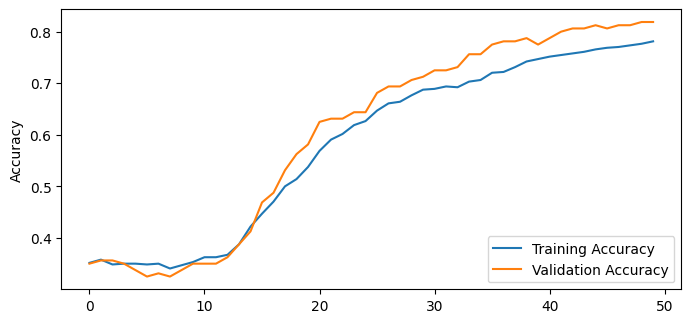

In [ ]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
model.save('../modelh5/model_mfcc.h5')

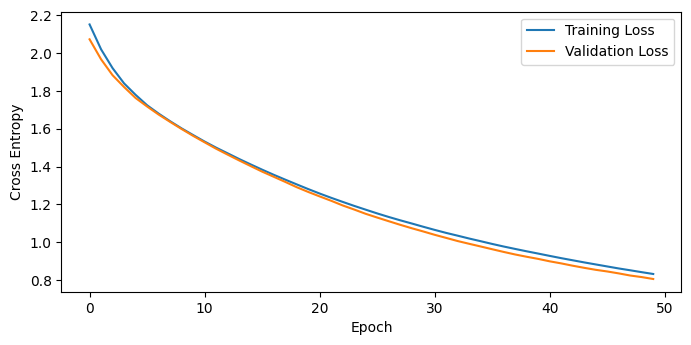

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

5/5 [==============================] - 0s 2ms/step


array([[23,  3,  7,  2,  2],
       [ 3, 28,  0,  0,  3],
       [ 2,  1, 26,  0,  0],
       [ 0,  2,  1, 27,  2],
       [ 0,  0,  0,  1, 27]])

In [ ]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.82      0.62      0.71        37
           1       0.82      0.82      0.82        34
           2       0.76      0.90      0.83        29
           3       0.90      0.84      0.87        32
           4       0.79      0.96      0.87        28

    accuracy                           0.82       160
   macro avg       0.82      0.83      0.82       160
weighted avg       0.82      0.82      0.81       160



### Testing

In [ ]:
model_uri = '../modelh5/model_mfcc.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential_230"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_463 (Conv1D)         (None, 99, 64)            256       
                                                                 
 max_pooling1d_463 (MaxPool  (None, 50, 64)            0         
 ing1D)                                                          
                                                                 
 conv1d_464 (Conv1D)         (None, 48, 32)            6176      
                                                                 
 max_pooling1d_464 (MaxPool  (None, 24, 32)            0         
 ing1D)                                                          
                                                                 
 flatten_163 (Flatten)       (None, 768)               0         
                                                                 
 dense_384 (Dense)           (None, 64)             

In [ ]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


In [ ]:
predict('../data/training/MS/New_MS_003.wav')

1/1 [==============================] - 0s 89ms/step
[0.00232533 0.9573394  0.00242575 0.03396185 0.00394782]
1
Predicted class: MR
